---
---
# Uncovering Lifestyle Driven Obesity Patterns through Clustering

**Portfolio Project - Mathematics and Multivariate Statistics**
---
---
---

## Pitch Summary
<div class="alert alert-block alert-warning">
  <ul>
    <li><strong>Objective</strong>: To identify meaningful lifestyle-based population segments related to obesity risk using clustering techniques, enabling targeted and personalized public health interventions.</li> <li><strong>Context</strong>: Obesity is a growing public health issue influenced by diverse behavioral, demographic, and lifestyle factors, demanding targeted and effective interventions.</li> <li><strong>Method</strong>: We apply unsupervised clustering techniques—K-Means, DBSCAN/OPTICS, and Hierarchical Agglomerative Clustering—along with PCA to segment populations based on health and lifestyle metrics such as physical activity, diet, and BMI.</li> <li><strong>Expected Outcome</strong>: Identification of distinct lifestyle-based clusters with varying obesity risk profiles, enabling early detection and strategic health planning.</li> <li><strong>Value</strong>: Insights can guide personalized wellness initiatives, enhance public health outreach, and reduce long-term obesity-related healthcare burdens.</li>
  </ul>
</div>

## Dataset Reference

<div class="alert alert-block alert-warning">

    
* **The source**  : [Obesity Dataset](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)
* **Author**: Fabio Mendoza Palechor and Alexis De la Hoz Manotas
* **License**: [CC0 4.0 Public Domain](https://creativecommons.org/licenses/by/4.0/legalcode)
* **Scientific sources to validate the dataset**: [Source 1](https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub)
[Source 2](https://www.semanticscholar.org/paper/Dataset-for-estimation-of-obesity-levels-based-on-Palechor-Manotas/35b40bacd2ffa9370885b7a3004d88995fd1d011)



* The dataset was collected to analyze lifestyle and physical condition factors contributing to obesity. It enables clustering analysis to uncover behavioral and demographic patterns, supporting the development of targeted public health interventions and personalized wellness strategies.

</div>

## Dataset Suitability

<div class="alert alert-block alert-warning">

* The dataset includes essential lifestyle and health metrics like BMI, physical activity level, and eating habits, which are key indicators for obesity and suitable for clustering analysis.

* Continuous and ordinal variables allow effective clustering to identify patterns in lifestyle-driven obesity risk profiles.

* The dataset’s structure and diversity of features make it ideal for segmenting the population into meaningful clusters, uncovering hidden behavioral patterns that can support personalized public health strategies.

</div>

# Imports and Settings
---
<div class="alert alert-block alert-warning">
Use the following code cell to organize all imports and global settings.
Do not remove the pandas option.
    
(Commented code, in the next cell)
</div>

In [1]:
#Importing all the required Libraries
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn import cluster
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score,silhouette_samples,davies_bouldin_score

# Task 1 -- The Data

## The Raw Data
<div class="alert alert-block alert-warning">

Load the data and present a couple of samples. Call the dataset variable __raw_data__.

(Commented code, add cells below)
</div>


In [2]:
# Loading the dataset.
raw_data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
print(raw_data.shape)
raw_data.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


<div class="alert alert-block alert-warning">

## **Dataset Explanation**

This dataset contains information about individuals and their lifestyle habits related to nutrition and physical activity. The goal is typically to identify patterns that relate to obesity levels, making it suitable for clustering people into lifestyle or health-related groups.

</div>


| **Feature**                      | **Range**                                                                                                                                     | **Explanation**                                                   |
|----------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------|
| `Gender`                         | {Male, Female}                                                                                                                                | Biological sex of the individual.                                 |
| `Age`                            | ℝ (e.g., 14–61)                                                                                                                               | Age of the individual in years.                                   |
| `Height`                         | ℝ (e.g., 1.45–1.98)                                                                                                                           | Height in meters.                                                 |
| `Weight`                         | ℝ (e.g., 39–173)                                                                                                                              | Weight in kilograms.                                              |
| `family_history_with_overweight`| {yes, no}                                                                                                                                      | Whether any family member has a history of being overweight.      |
| `FAVC`                           | {yes, no}                                                                                                                                      | Frequent consumption of high-caloric food.                        |
| `FCVC`                           | ℝ (1.0–3.0)                                                                                                                                    | Frequency of eating vegetables (1 = never, 3 = always).           |
| `NCP`                            | ℝ (1.0–4.0)                                                                                                                                    | Number of main meals per day.                                     |
| `CAEC`                           | {no, Sometimes, Frequently, Always}                                                                                                           | Consumption of food between meals.                                |
| `SMOKE`                          | {yes, no}                                                                                                                                      | Smoking habit.                                                    |
| `CH2O`                           | ℝ (1.0–3.0)                                                                                                                                    | Daily water consumption (1 = less, 3 = more).                     |
| `SCC`                            | {yes, no}                                                                                                                                      | Whether the person monitors their calorie intake.                 |
| `FAF`                            | ℝ (0.0–3.0)                                                                                                                                    | Frequency of physical activity (in hours per week).               |
| `TUE`                            | ℝ (0.0–2.0)                                                                                                                                    | Time spent using technology devices (in hours per day).           |
| `CALC`                           | {no, Sometimes, Frequently, Always}                                                                                                           | Frequency of alcohol consumption.                                 |
| `MTRANS`                         | {Automobile, Bike, Motorcycle, Public_Transportation, Walking}                                                                               | Mode of transportation used.                                      |
| `NObeyesdad`                     | {Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III}            | Target variable: classification of obesity level.                 |


<div class="alert alert-block alert-warning">
Explain why the dataset is suitable for the pitched task!
    
(Add up 3 bullet points in the cell below)
</div>

## Suitability for Clustering
This data set is incredibly suitable for clustering for the following reasons:

- **Variety of lifestyle attributes:**
It has an unbelievable amount of lifestyle attributes, which can be taken into consideration (eating style, amount of activity and daily living habits), which therefore leads to behaviour-based clustering.

- **Numerical attributes for distance-based clustering:**
It contains a set of features that are numerical (i.e., age, height, weight, physical activity, water intake) and therefore can be grouped using distance-based algorithms like K-Means as an important feature.

- **Categorical features:**
It includes categorical variables that can be encoded and used in a way that benefits clustering by accounting for the range of lifestyle and having more interpretable segmentation within clusters.

- **Relevant to the real world:**
The dataset is obesity and health-related. Clustering for helping to identify risk groups or to identify common behaviour profiles can be of practical application.

# Task 2 -- Initial Data Analysis

<div class="alert alert-block alert-warning">
<b>Initial Data Analysis (IDA)</b>: Present relevant quantities about the data.
    
(Commented Code + bullet points, add cells below)
</div>

In [3]:
# Displaying the number of rows and columns in the dataset.

print(f"Dataset contains {raw_data.shape[0]} rows and {raw_data.shape[1]} columns.")

Dataset contains 2111 rows and 17 columns.


In [4]:
# Basic information about the dataset.

print("\nDataset Info:\n")
raw_data.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF               

In [5]:
# Statistical summary of the dataset.
print("\nStatistical Summary:")
display(raw_data.describe(include='all'))


Statistical Summary:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [6]:
# Displaying the descriptive statistics for all numeric columns.

raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [7]:
# Displaying the total number of null values in the dataset.

print("\nList of Null Values:")
raw_data.isnull().sum()


List of Null Values:


,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [8]:
# Displaying the total number of unique values for each column.

raw_data.select_dtypes(include='object').nunique()

,0
Gender,2
family_history_with_overweight,2
FAVC,2
CAEC,4
SMOKE,2
SCC,2
CALC,4
MTRANS,5
NObeyesdad,7


# Task 3 -- Preprocessing

<div class="alert alert-block alert-warning">
Conduct all steps of Task 3. Call the result "data".
    
(Commented code + bullet points, add cells below)
</div>

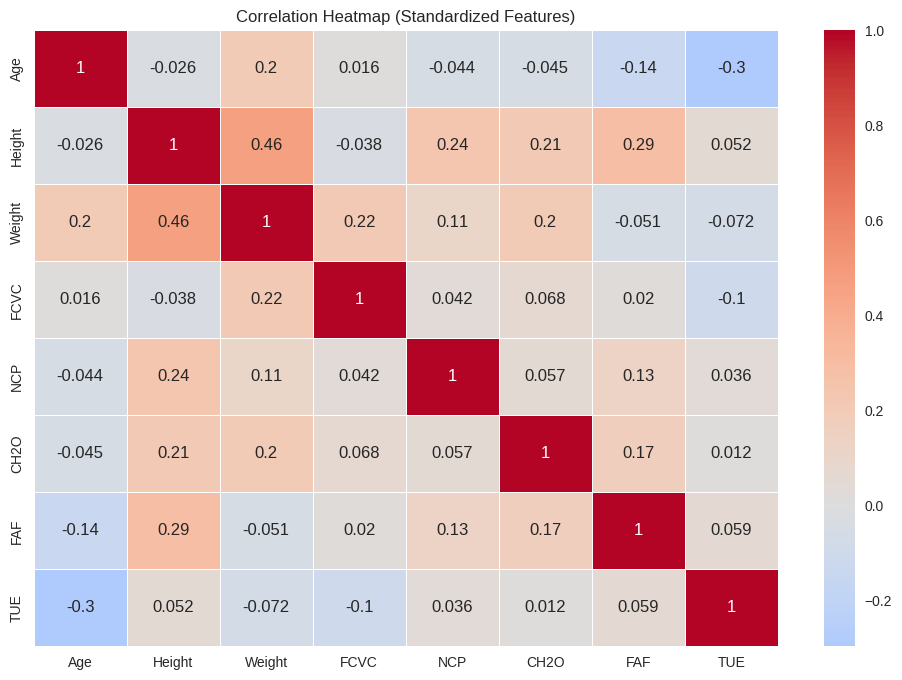

In [9]:
# Selecting only numeric columns.
numeric_data = raw_data.select_dtypes(include=['number'])

# Plotting the Correlation matrix.
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', center=0, linewidths=0.5, annot=True)
plt.title('Correlation Heatmap (Standardized Features)')
plt.show()

To examine the linear relationship among numeric variables, we performed a correlation heatmap of standardised data features. The values in the cells of the matrix range from -1 (where there is a strong negative correlation) to +1 (where there is a strong positive correlation).

## Insights:
- Firstly, weight and height are related positively moderately with the value of the coefficient (0.46) being as anticipated.
- Second, Weight and Age are moderately correlated with a positive correlation (0.20), suggesting that age could be having an impact on the trend of weight.
- Other characteristics, such as TUE (Technology Use for Exercise), are negatively or weakly related to the other characteristics, indicating they may vary independently. The matrix is useful for revealing relationships that affect decision making and clustering by highlighting likely feature interactions.

Numeric columns: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


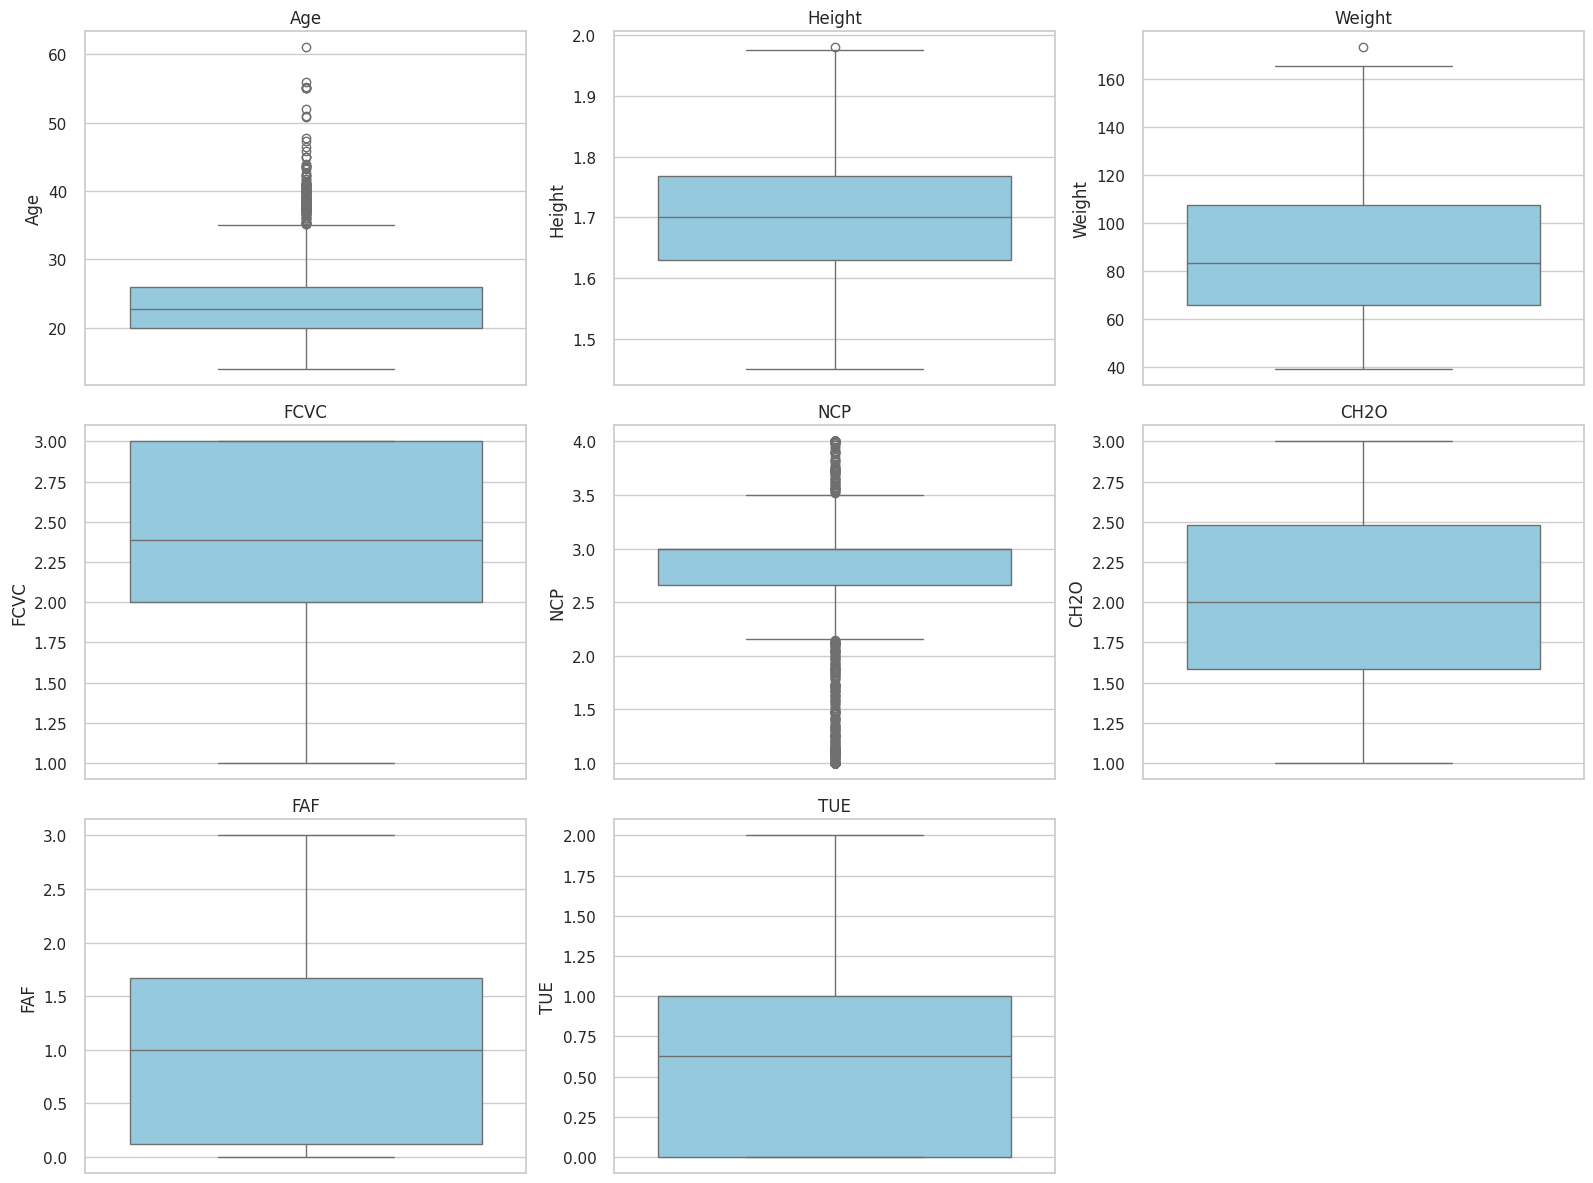

In [10]:
# Selecting the numeric columns and ploting the box plots to visualize the distribution and detect outliers across features.

numeric_cols = raw_data.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:", numeric_cols)
sns.set(style="whitegrid")

ncols = 3
nrows = math.ceil(len(numeric_cols) / ncols)

plt.figure(figsize=(16, 4 * nrows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(y=raw_data[col], color='skyblue')
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

## Insights:
- **Age:** Most values occur at an age less than 30, but there are some values over 40.
- **Height:** Heights occur around 1.7 m together with an outlier above 1.9.
- **Weight:** Weights are very spread out around a median of 85kg, including several outliers above 160kg.
- **FCVC (Frequency of Vegetable Consumption):** Values are generally high, and also together at almost every value between 2 and 3.
- **NCP (Number of Main Meals):** Generally, all values are clustering around 3 meals, as well as clustering at either end.
- **CH2O (Water Recommendation):** Most people drink between 1.5 to 2.5 litres of water per day with no significant outliers.
- **FAF (Fruit and Activity Frequency):** Most physical activity is clustered toward lower values, but there is a wide interquartile range.
- **TUE (Technology use and exercise):** Technology use for exercise is generally very low and clustered into values of 0 and 1, with a few reaching a max of 2.

In [11]:
# Removing the outliers using IQR Method.
filtered_data = raw_data.copy()
for col in numeric_cols:
    Q1 = filtered_data[col].quantile(0.25)
    Q3 = filtered_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = filtered_data[(filtered_data[col] >= lower_bound) & (filtered_data[col] <= upper_bound)]

In [12]:
filtered_data.shape

(1398, 17)

In [13]:
# Dropping NObeyesdad column from the dataset.
df = filtered_data.drop(columns=["NObeyesdad"])

In [14]:
# Converting binary categorical columns to numerical format by using Manual Mapping.

binary_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_cols:
    df[col] = df[col].map({"yes": 1, "no": 0})
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,1,0,3.0,3.0,Sometimes,1,3.000000,1,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,0,0,3.0,3.0,Sometimes,0,2.000000,0,2.000000,0.000000,Frequently,Walking
5,Male,29.000000,1.620000,53.000000,0,1,2.0,3.0,Sometimes,0,2.000000,0,0.000000,0.000000,Sometimes,Automobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,1,1,3.0,3.0,Sometimes,0,1.728139,0,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,1,1,3.0,3.0,Sometimes,0,2.005130,0,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,1,1,3.0,3.0,Sometimes,0,2.054193,0,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,1,1,3.0,3.0,Sometimes,0,2.852339,0,1.139107,0.586035,Sometimes,Public_Transportation


In [15]:
# Applying one-hot encoding to selected categorical columns of the dataset.

one_hot_cols = ["Gender", "CAEC", "CALC", "MTRANS"]
data = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)
data

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,Gender_Male,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0,2.000000,0,0.000000,1.000000,False,False,True,False,False,True,False,False,True,False
1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,3.000000,1,3.000000,0.000000,False,False,True,False,True,False,False,False,True,False
2,23.000000,1.800000,77.000000,1,0,2.0,3.0,0,2.000000,0,2.000000,1.000000,True,False,True,False,False,False,False,False,True,False
3,27.000000,1.800000,87.000000,0,0,3.0,3.0,0,2.000000,0,2.000000,0.000000,True,False,True,False,False,False,False,False,False,True
5,29.000000,1.620000,53.000000,0,1,2.0,3.0,0,2.000000,0,0.000000,0.000000,True,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,1,1,3.0,3.0,0,1.728139,0,1.676269,0.906247,False,False,True,False,True,False,False,False,True,False
2107,21.982942,1.748584,133.742943,1,1,3.0,3.0,0,2.005130,0,1.341390,0.599270,False,False,True,False,True,False,False,False,True,False
2108,22.524036,1.752206,133.689352,1,1,3.0,3.0,0,2.054193,0,1.414209,0.646288,False,False,True,False,True,False,False,False,True,False
2109,24.361936,1.739450,133.346641,1,1,3.0,3.0,0,2.852339,0,1.139107,0.586035,False,False,True,False,True,False,False,False,True,False


# Task 4 -- Exploratory Data Analysis

<div class="alert alert-block alert-warning">
Present 3 highlights from the exploratory data analysis in your draft.

(Commented code + bullet points, add cells below under the respective hightlight headlines)

## EDA Highlight 1

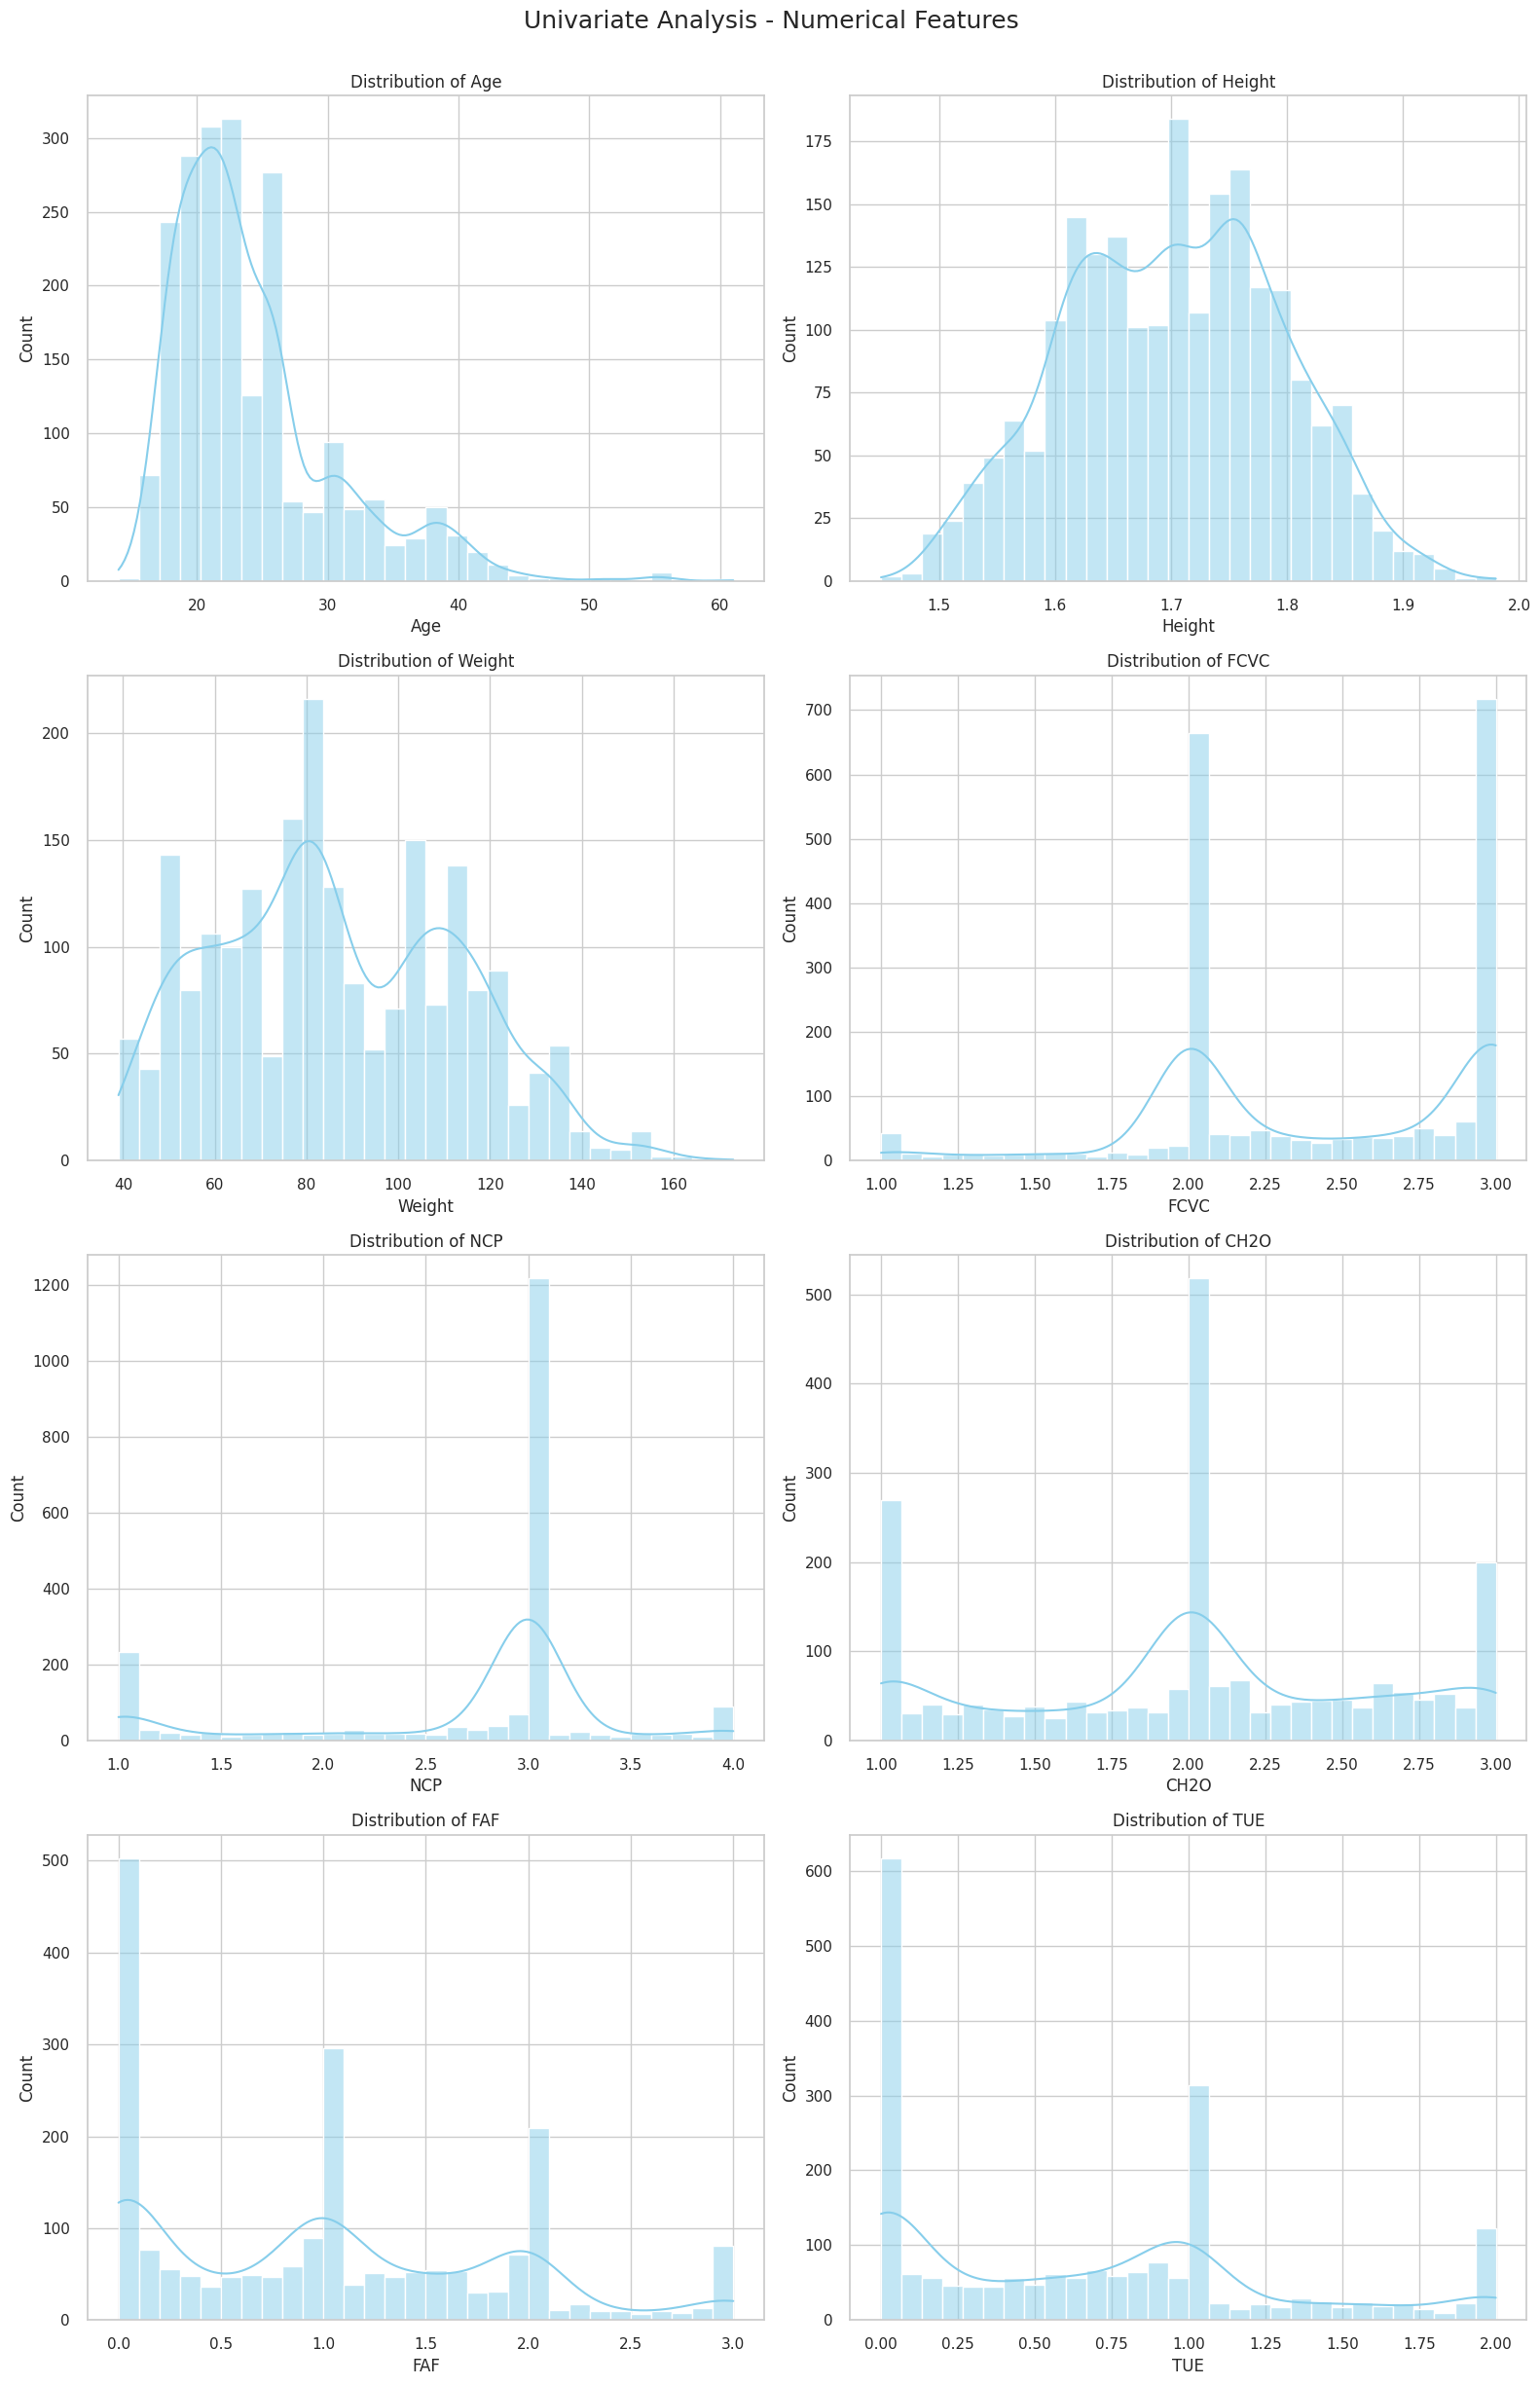

In [16]:
# Ploting distribution graph for all numerical columns.

numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(16, 24))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 2, i + 1)
    sns.histplot(raw_data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.suptitle("Univariate Analysis - Numerical Features", fontsize=18, y=1.02)
plt.show()

## Key Insights

- **Age:** A right-skewed frequency distribution is seen in the age variable. Most of the age values lie between 15 and 30 years.

- **Height:** The data for height yields close to a normal distribution with an average height of approximately 1.7 metres.

- **Weight:** Weight frequency distribution is multi-modal, indicating that the participants possessed varying body sizes.

- **FCVC (Frequency of Vegetable Consumption):** The frequency values for FCVC clustered around 2 and 3, suggesting that participants consume vegetables at a reasonable frequency.

- **NCP (Number of Main Meals):** Counts for the number of meals consumed per day peaked at 3 meals, and it was determined that this is the most frequent amount consumed per day by participants.

- **CH2O (Water Intake):** The majority of participants reported consuming around 2 litres of water daily, with some reporting slightly less.

- **FAF (Frequency of Physical Activity):** A fair percentage of participants indicated very low to moderate physical activity.

- **TUE (Technology Use):** Most participants reported no to very little use of technology for exercise.

## EDA Highlight 2

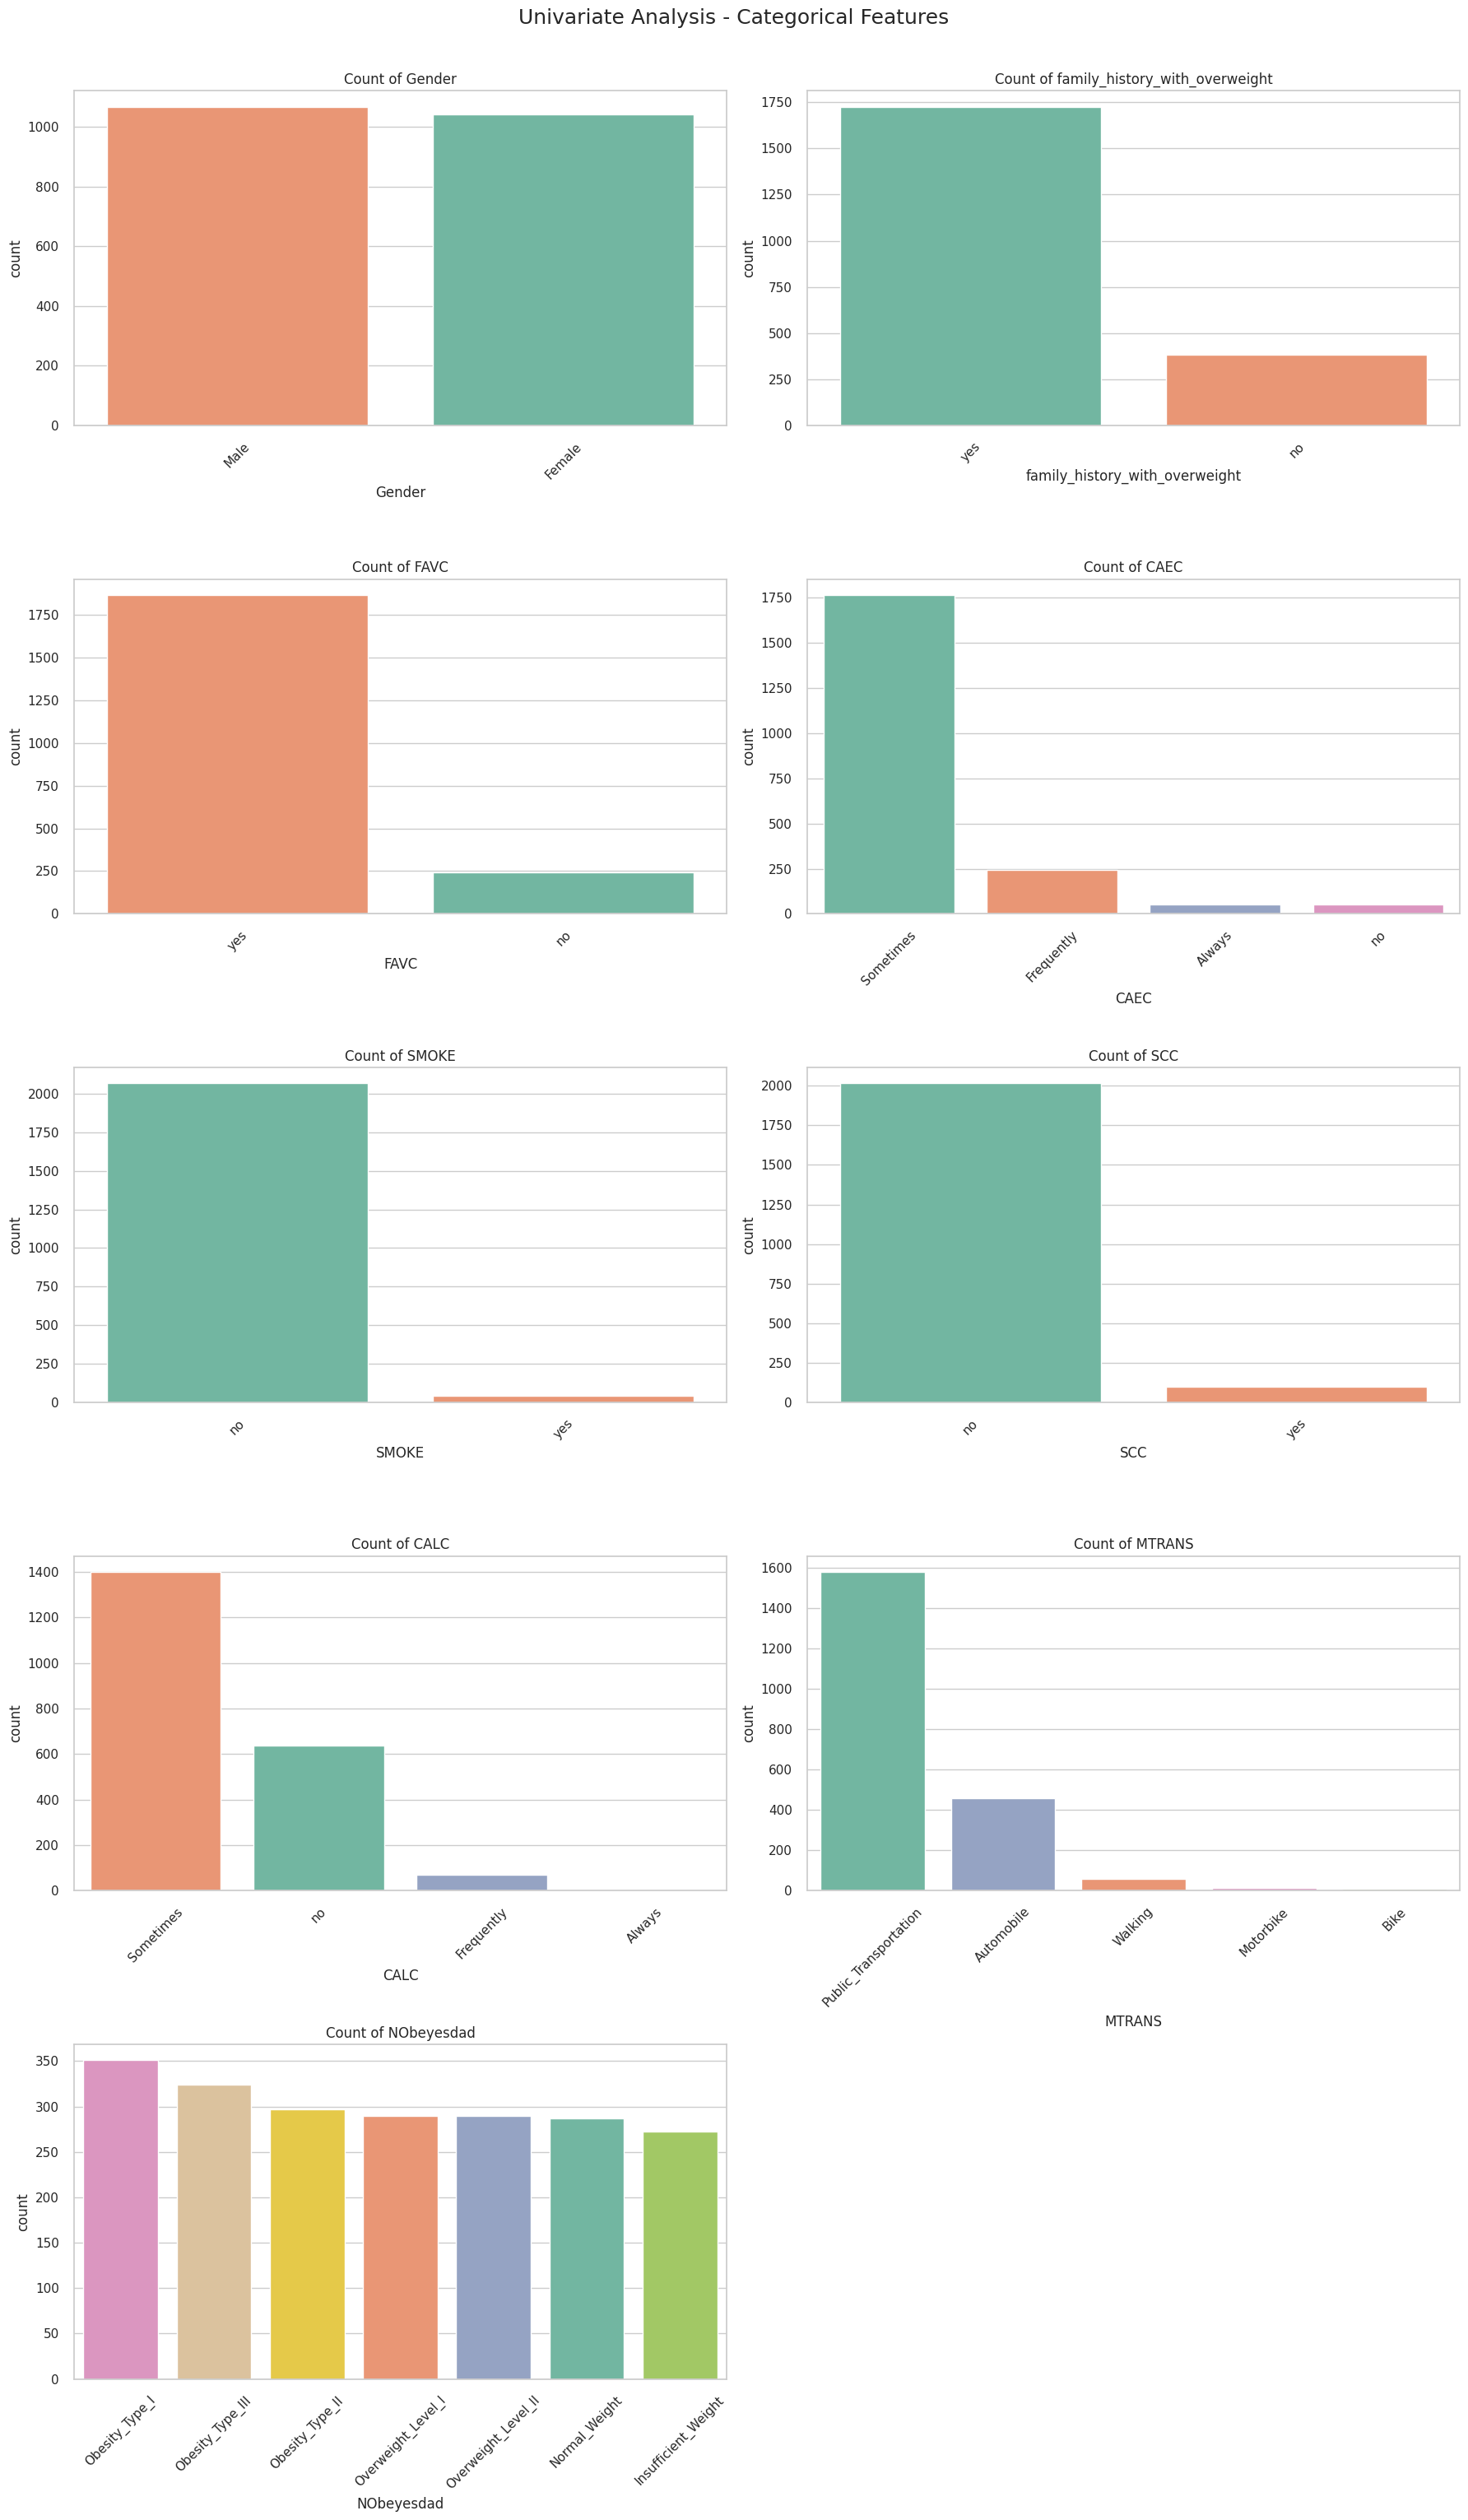

In [17]:
# Ploting distribution graph for Categorical Features.

categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC','SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

plt.figure(figsize=(18, 30))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 2, i + 1)
    sns.countplot(data=raw_data,x=col,hue=col,order=raw_data[col].value_counts().index, palette="Set2",legend=False)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("Univariate Analysis - Categorical Features", fontsize=18, y=1.02)
plt.show()

## Key Insights:

- **Gender:** The sample is nearly equal in gender balance, with almost the same number of males and females.

- **Families' History of Overweight:** Most people said they do not have a family history of overweight.

- **FAVC (very frequent consumption of high-cal foods):** Most of the results seem to reflect a yes response that very frequently high-cal foods are consumed.

- **CAEC (eating between meals):** Most of the participants said sometimes, with very few always or never for this variable.

- **SMOKE:** The vast majority of participants responded no to any smoking.

- **SCC (tracking calorie intake):** Most do not track their calories.

- **CALC (consumption of alcoholic drinks):** Most participants responded sometimes regarding their alcohol consumption, and several mentioned no alcohol consumption.

- **MTRANS:** The most common commuting method was public transportation, followed by cars.

- **NObeyesdad:** The obesity classes were relatively balanced, with slightly more participants being obese and overweight.


## EDA Highlight 3

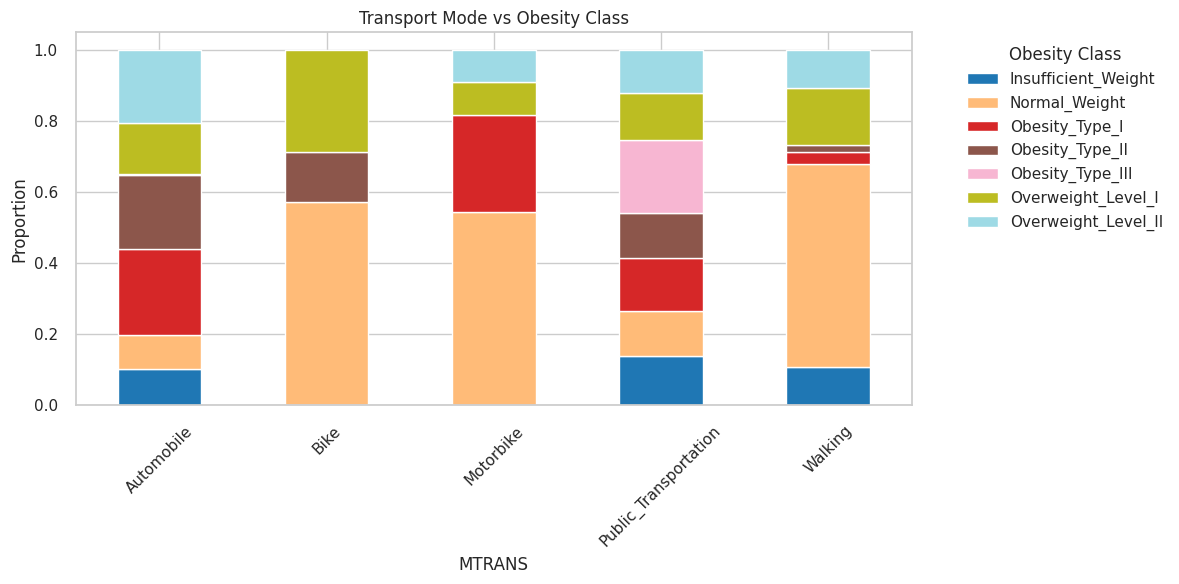

In [18]:
# Plotting a stacked bar chart to compare obesity classes across different modes of transportation.

transport_obesity = pd.crosstab(raw_data['MTRANS'], raw_data['NObeyesdad'], normalize='index')

transport_obesity.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Transport Mode vs Obesity Class")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title='Obesity Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Key Insights:

- **Walking and Biking:**
These transportation modes had the greatest proportions of Normal Weight and Insufficient Weight individuals.
This suggests a relationship between active transportation and healthier body weight.
The walking category also has low severity obesity levels.

- **Public Transportation:**
It is a mixture of all the weight categories.
Because there are moderate overweight and obesity rates, and acceptable levels of Obesity Type III, it may be indicative of an urban sedentary lifestyle.

- **Car:**
There are higher rates of Obesity_Type_I and II and Overweight_Level_II.
These results could suggest that sedentary travel methods are associated with increased obesity levels.

- **Motorcycle:**
 The motorcycle results have similar levels of obesity and overweight.
The results show a greater incidence of Obesity_Type_I and Normal Weight in particular, showing a bimodal result with the two extremes.  

- **Bike:**
The bike category has primarily Normal Weight individuals and very low levels of obesity.
This again reinforces the idea that cycling is associated with healthier weight maintenance practices.

In [19]:
# Standardizing all features.

columns = data.columns
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=columns)
data

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,Gender_Male,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.518058,-1.083871,-1.017148,0.420437,-2.801446,-0.825096,0.209831,-0.145545,-0.077032,-0.224362,-1.215955,0.511752,-1.036428,-0.332273,0.391747,-0.11095,-1.648662,1.791883,-0.065653,-0.065653,0.473464,-0.164881
1,-0.518058,-2.229181,-1.308505,0.420437,-2.801446,0.993609,0.209831,6.870728,1.574178,4.457092,2.329102,-1.199417,-1.036428,-0.332273,0.391747,-0.11095,0.606553,-0.558072,-0.065653,-0.065653,0.473464,-0.164881
2,-0.038155,0.977687,-0.543694,0.420437,-2.801446,-0.825096,0.209831,-0.145545,-0.077032,-0.224362,1.147416,0.511752,0.964852,-0.332273,0.391747,-0.11095,-1.648662,-0.558072,-0.065653,-0.065653,0.473464,-0.164881
3,0.921652,0.977687,-0.179498,-2.378475,-2.801446,0.993609,0.209831,-0.145545,-0.077032,-0.224362,1.147416,-1.199417,0.964852,-0.332273,0.391747,-0.11095,-1.648662,-0.558072,-0.065653,-0.065653,-2.112093,6.064964
4,1.401555,-1.083871,-1.417763,-2.378475,0.356958,-0.825096,0.209831,-0.145545,-0.077032,-0.224362,-1.215955,-1.199417,0.964852,-0.332273,0.391747,-0.11095,0.606553,-0.558072,-0.065653,-0.065653,-2.112093,-0.164881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,-0.523615,-0.044731,1.437841,0.420437,0.356958,0.993609,0.209831,-0.145545,-0.525931,-0.224362,0.764868,0.351324,-1.036428,-0.332273,0.391747,-0.11095,0.606553,-0.558072,-0.065653,-0.065653,0.473464,-0.164881
1394,-0.282200,0.388815,1.522859,0.420437,0.356958,0.993609,0.209831,-0.145545,-0.068561,-0.224362,0.369146,-0.173965,-1.036428,-0.332273,0.391747,-0.11095,0.606553,-0.558072,-0.065653,-0.065653,0.473464,-0.164881
1395,-0.152363,0.430298,1.520907,0.420437,0.356958,0.993609,0.209831,-0.145545,0.012452,-0.224362,0.455195,-0.093509,-1.036428,-0.332273,0.391747,-0.11095,0.606553,-0.558072,-0.065653,-0.065653,0.473464,-0.164881
1396,0.288644,0.284202,1.508426,0.420437,0.356958,0.993609,0.209831,-0.145545,1.330358,-0.224362,0.130111,-0.196612,-1.036428,-0.332273,0.391747,-0.11095,0.606553,-0.558072,-0.065653,-0.065653,0.473464,-0.164881


For all features to equally contribute to clustering and analysis, we used z-score normalisation with StandardScaler. This transforms the dataset to standardise it by centring the values of each feature to mean 0, and scaling it to a standard deviation of 1. Scaling left the column structure the same to retain consistency for further analysis.

# Task 5 -- Dimensionality Reduction

<div class="alert alert-block alert-warning">
<b>PCA</b>:
Conduct your analyses and transformations according to Task 5.
Call the transformed dataset "data_pca".

(Commented code + bullet points, add cells below)
</div>

To reduce the dimensionality of the dataset, retaining the most important information, we employed *Principal Component Analysis (PCA)*. PCA compresses the dataset into a set of components, preserving the maximum variance, allowing us to summarise the data in lower dimensions, retaining its basic structure.


## Measures Taken:
1. **PCA Transformation:** We applied PCA to the scaled data in order to get the principal components, which pick a direction of maximum variance in the data.
2. **Explained Variance Analysis:** We have calculated the explained variance ratio for all components, and it is a percentage measure of total variance explained by each component. We have also represented cumulative explained variance in such a way that we can see the amount of variance that we are leaving behind while we continue to add more components.
3. **Selection of Components:** According to the above plot of variances and our need to retain at least 95% of the total variance, we computed the number of components necessary to ensure this.

In [20]:
# Applying PCA to the standardized data to extract all principal components for variance analysis.
pca_full = PCA()
data_pca = pca_full.fit_transform(data)

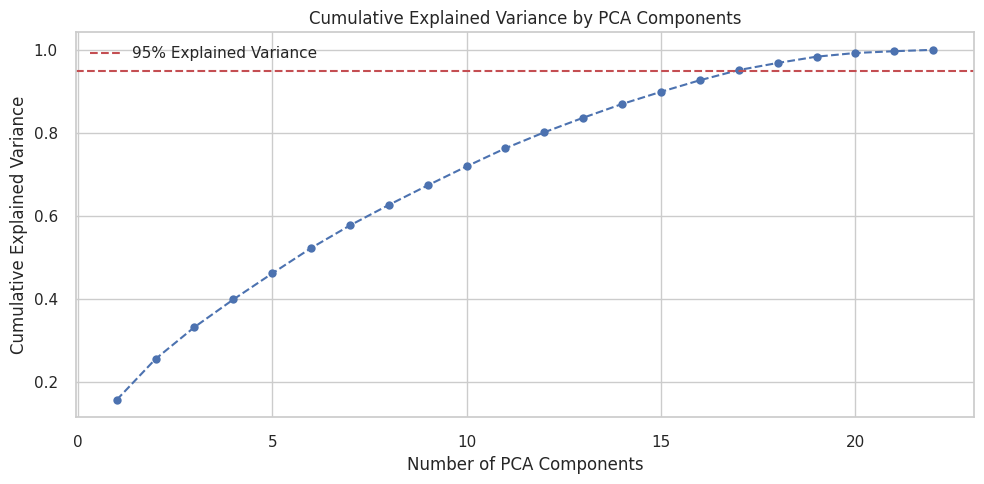

In [21]:
# Ploting the cumulative explained variance to determine how many PCA components are needed to capture at least 95% of the dataset's variance.

explained_var_ratio = pca_full.explained_variance_ratio_
cumulative_explained_var = np.cumsum(explained_var_ratio)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_explained_var, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# Selecting the minimum number of PCA components needed to retain ≥95% of the variance and appling dimensionality reduction accordingly.

n_components = np.argmax(cumulative_explained_var >= 0.95) + 1
print(f"\n Number of components to explain ≥95% variance: {n_components}")

pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data)


 Number of components to explain ≥95% variance: 17


In [23]:
data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
data_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-2.170827,-0.063854,1.961534,-1.289619,0.922785,0.429671,-0.030935,-0.694828,-0.356458,0.709081,0.436138,0.015692,-2.216491,-0.983680,-0.144229,-1.034567,-0.568215
1,-2.016255,-1.874297,-3.028009,0.640674,2.419955,0.624560,-1.013156,-2.631426,4.699183,0.407709,4.356513,0.585441,-2.812785,0.371308,1.679691,0.628658,2.818502
2,-0.797419,1.769586,0.131026,0.406475,0.890467,-0.861556,-0.504835,-0.296718,0.360897,0.231588,0.237304,-0.644777,-1.650548,-0.605249,-0.832338,-1.717527,-0.141107
3,-1.629591,2.505865,-3.440113,-2.272390,2.960763,-0.260552,2.627316,-0.262568,0.729531,-1.732646,-0.806056,-2.832156,0.103914,-1.851702,0.202642,0.676274,-1.419682
4,-0.210884,0.054274,-1.654843,-3.040024,-0.905965,-0.349389,-0.736928,0.604579,-0.800268,0.324021,-0.121670,-1.027454,-0.292559,1.349658,-0.632890,1.605314,-0.327497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,1.181449,-1.166619,0.453783,0.745147,0.600811,-0.176856,0.664225,0.156100,0.620041,-0.170583,0.218756,0.072715,1.017682,-0.254357,-0.234913,-0.803643,0.300242
1394,1.524598,-1.096158,0.201065,0.851949,0.619958,0.187786,0.442736,0.203402,0.405447,-0.102332,0.138844,-0.160251,0.767056,-0.291391,-0.016335,-0.480292,0.074542
1395,1.555817,-1.024560,0.168268,0.893674,0.650429,0.214558,0.483056,0.187344,0.412050,-0.102338,0.138005,-0.130715,0.740998,-0.204901,-0.099132,-0.479223,0.112774
1396,1.837142,-1.031716,-0.014678,1.079513,1.023267,0.671831,0.512240,0.116315,-0.034413,0.017615,0.023882,0.027199,-0.034348,0.136920,-0.153207,0.269662,0.125411


## Results:
The graph shows how cumulative variance changes with the addition of PCA components. On the basis of cumulative variance, we can determine the minimum number of components required to explain 95% of the variance of our data. This will eliminate dimension at a cost of very little information.

## Observations from the Explained Variance Plot:

- Steep slope: The other components capture increasingly more variance with very rapid conditions, and the first components naturally capture the most variance in their representation.
- Number of components: The plot suggests that we would require 17 components with approximately 95% variance of our data preserved after PCA, i.e. 17-d lower-dimensional representation would be the optimal number of components to preserve the most important information.
- Diminishing Returns: After the 17th component, the curve starts to flatten, which shows that additional components would only add, and not in a significant manner, to explaining additional variance.

## Conclusion

We have 17 PCA components, which give us a good trade-off between the representation of the dataset and its dimensionality reduction, retaining most of its variance. This dimensionality reduction can aid in clustering in later steps and can also be a good representative of clusters in later steps.

# Task 6 -- Clustering

<div class="alert alert-block alert-warning">
<b>Choice of Algorithm</b>:
Given the situation in the pitch and the results from the above analyses. Which algorithm (chosen from those discussed in the lectures) would YOU choose for the clustering? Explain!
    
(Choice + 1-3 bullet points in the cell below)
</div>

# **Algorithm Choice: K-Means++**



Throughout, the optimal performing clustering algorithm that was executed was K-Means++. The clusters were distinct and well-separated, possessing good silhouette and Davies-Bouldin scores, which allowed us to provide significant interpretations between different obesity and lifestyle profiles.

On the other hand, DBSCAN produced fewer clusters than the number of clusters with most lying in noise; there was not the same level of distinction and therefore granularity in the output. HAC also produced overlapping clusters with low evaluation scores, reflecting poor structure and consistency in the creation of clusters.

## Other considerations:

- Simplicity and Efficiency: K-means has a record of being computationally efficient with this moderately sized dataset (2111 samples). K-means is a more efficient clustering method for taking a dataset and clustering it into comparison-based clusters.
    
- Standardised Data: As the dataset is standardised, K-means is appropriate because K-means calculates its location using distance calculations and is not being detrimentally affected by unscaled features.
    
- Interpretive Power: K-means generates a clear centroid (cluster location in terms of point average), making it simple to define and describe the features of each cluster. This is useful when dealing with behaviour or healthcare analysis.

**Conclusion:**

K-Means++ performed better than DBSCAN and HAC since it produced clearer clusters, superior evaluation metrics and clearer interpretive assessment. K-means++ was the best choice to utilise within this exercise.

My Choice: ...

**Selected Algorithm: K-Means++ Clustering**

<div class="alert alert-block alert-danger">
<b>Requirements</b>:
In the following and for the remainder of the final phase of the exam (indenpendent of what your choice above suggests), use

* a clustering algorithm $A$ chosen from the family: __k-means/k-means++__
* the evaluation metric $E_1$: __Silhouette Score__
* the evaluation metric $E_2$: __Davies-Bouldin Index__.
</div>

## Comprehensive clustering analysis
<div class="alert alert-block alert-warning">
<b>Clustering</b>:
On both datasets, data and data_pca, under their respective headlines below, conduct comprehensive clustering analyses with algorithm $A$, using the available methodology from the module and specifically $E_1$ and $E_2$. Conduct ALL necessary steps to create the most helpful and meaningful clustering per dataset and discuss its quality. Use appropriate diagrams to demonstrate the results.

(Commented code + bullet points, add cells)
</div>

### Clustering Analysis of plain data

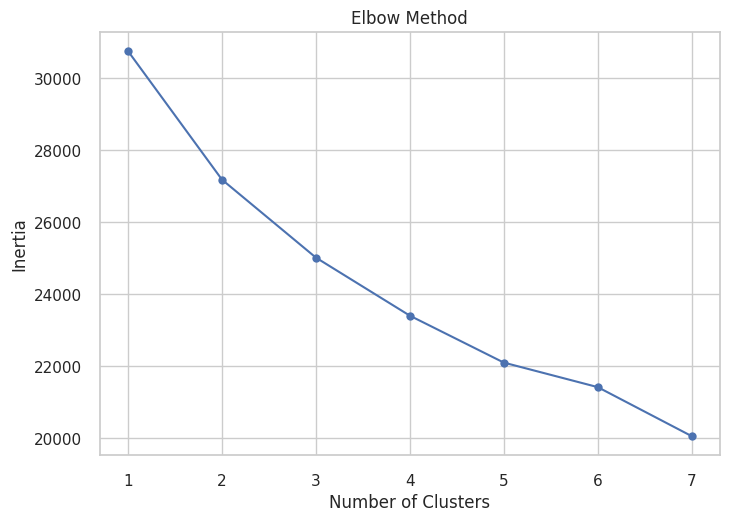

In [24]:
# Using the elbow Method to find the optimal number of clusters.

inertia = []
k_range = range(1, 8)
for k in k_range:
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=86)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve Method
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The Elbow Method is used to determine the ideal cluster quantity by plotting the inertia (the within-cluster sum of squares) for various values of k. In the present plot, the inertia continues to decrease as the number of clusters increases; however, it does appear there is a slower rate of improvement after k = 4.

The most noticeable "elbow" in the plot occurs around k = 4, where the decrease in inertia slows down significantly. This suggests that adding more clusters beyond k = 4 gives diminishing improvements in cluster compactness.

Using k = 4 produces distinct groupings in the data, which provides the best trade-off between compactness and interpretability without over fitting the number of clusters. This choice of k = 4 will be used for clustering in subsequent steps, providing a well-defined clustering structure.

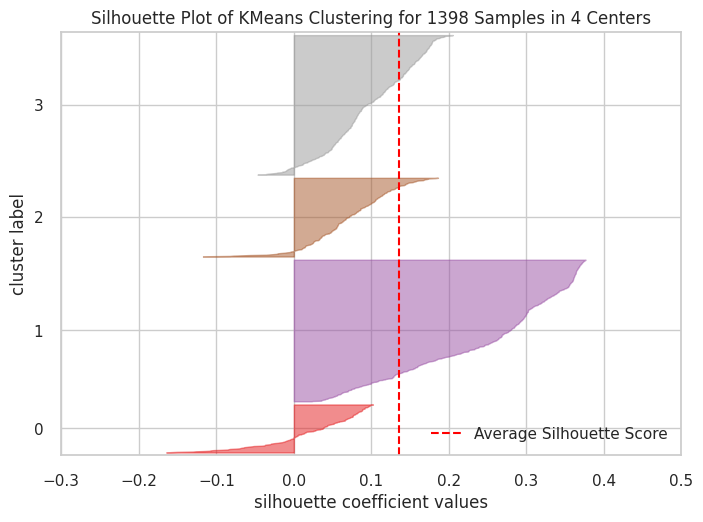

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1398 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
# Visualizing the clustering quality using a silhouette plot

model = KMeans(n_clusters=4, init='k-means++', random_state=86)

visualizer = SilhouetteVisualizer(model)
visualizer.fit(data)
visualizer.show()

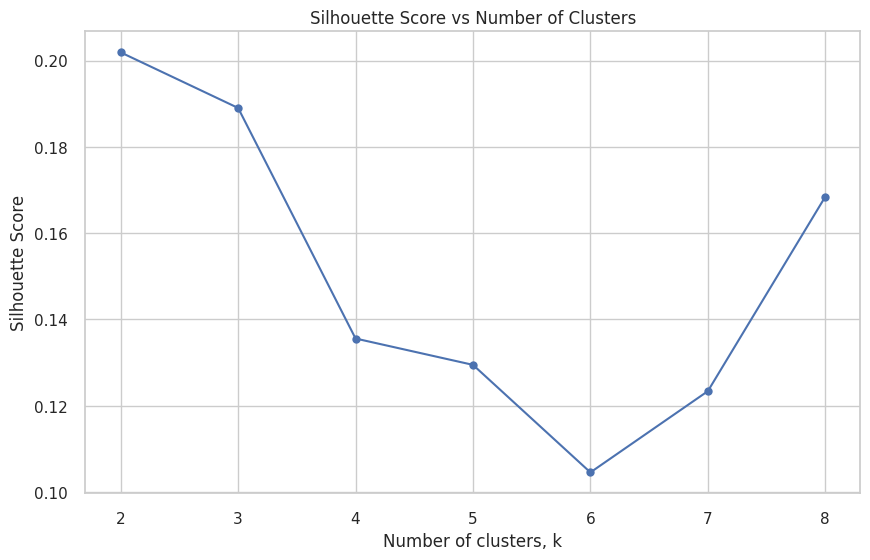

In [26]:
# Calculating the silhouette scores for different values of k to assess the clustering quality and identify the optimal number of clusters.
silhouette_scores = []
k_values = [2, 3, 4, 5, 6, 7, 8]

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=86)
    cluster_labels = kmeans.fit_predict(data)
    score = silhouette_score(data, cluster_labels)
    silhouette_scores.append(score)


# Ploting the silhouette scores for various cluster counts to visually identify the optimal number of clusters based on clustering quality.
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()


##  Silhouette Score for Identifying Optimal k (Clusters)

The Silhouette Score is a commonly used means of assessing the quality of clustering results. It gives a measure of how well each data point is clustered relative to other clusters. The value of the similarity score ranges from −1 to 1.
- Values around 1 suggest the data point is strongly fitted to the cluster it resides in and weakly fitted to the neighbouring clusters, which indicates a well-separated and distinct cluster structure.
- Values around 0 mean that the point is on the edge of the clusters, meaning uncertainty in cluster affiliation.
- Values less than 0 signify that the point probably should have been in another cluster and suggest that the clustering is likely not a good clustering result.

Thus, larger silhouette scores generally suggest that the clustering assessment is better, while smaller or negative silhouette scores generally imply worse or incorrect clustering.


## Methodology & Interpretation

K values were selected from an interval of 2 to 8 by applying the K-means algorithm. The silhouette score was computed for each respective k value to investigate the goodness of clustering. The scores were charted in order to see how well the data were being separated by changing the number of clusters.

The score for k = 4 is still pretty good, depicting relatively well-separated and understandable clusters and still well capable of detecting small subgroup patterns significantly.

In [27]:
# Appling KMeans clustering for preprocessed data with the specified number of clusters and predicting a cluster label.

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=86)
Kmeans_labels=kmeans.fit_predict(data)
Kmeans_labels

array([2, 1, 2, ..., 1, 1, 1], dtype=int32)

In [28]:
# Calculating the silhouette score for K-Means preprocessed data

Silhouette_score_kmeans = silhouette_score(data, Kmeans_labels)
print(f"Silhouette Score for K_Means: {Silhouette_score_kmeans}")

Silhouette Score for K_Means: 0.13555431463920406


In [29]:
# Calculate  the Davies-Bouldin score for K-Means preprocessed data

Davies_bouldin_score_kmeans = davies_bouldin_score(data, Kmeans_labels)
print(f"Davis Bouldin Score for K_Means: {Davies_bouldin_score_kmeans}")

Davis Bouldin Score for K_Means: 2.1838683821969203


## **Davies-Bouldin Score**

The Davies-Bouldin Score is a metric for validating clustering results. It quantifies the degree of separation and compactness of the clusters.

- The lower the Davies-Bouldin score indicates that the Clusters are dense (i.e., compact)and Clusters are separated from one another.
- The higher score demonstrates poor clustering because the clusters are overlapping or poorly defined.



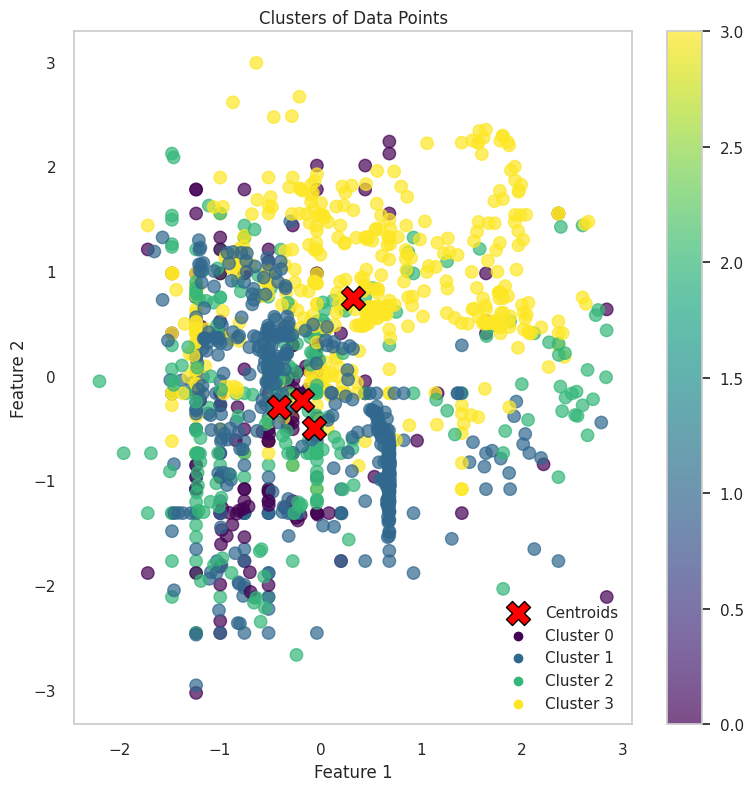

In [30]:
# Visualizing KMeans clustering for preprocessed data in 2D plot with cluster centroids

centroids_kmeans = kmeans.cluster_centers_

plt.figure(figsize=(9, 9))

scatter = plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=Kmeans_labels, cmap='viridis', s=80, alpha=0.7)
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], s=300, c='red',edgecolors='black', marker='X', label='Centroids')

for cluster_id in np.unique(Kmeans_labels):
    plt.scatter([], [], c=scatter.cmap(scatter.norm(cluster_id)), label=f'Cluster {cluster_id}')

plt.colorbar(scatter)
plt.title('Clusters of Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

### K-Means Clustering Visualisation (k = 4)
This scatterplot is a depiction of the iteration of K-Means with k = 4.

- Each point is a sample representing a data observation, with the colour indicating the cluster assigned by the K-Means algorithm.
- The clusters are colored using the 'viridis' colourmap, with the colour bar on the right corresponding to cluster indices (0 to 3).
- The centroids of each cluster are shown with a red 'X' marker. These are the central points around which K-Means grouped the data.
- The axes labelled Feature 1 and Feature 2 represent two data dimensions, which could be either original features.
- A legend is included to differentiate the centroids, and a grid is added to enhance readability.

### Interpretation
- The separation of clusters is apparent at the level of Cluster 3 (yellow), which shows the most dissociation from the other clusters in the dataset. Clusters 0, 1, and 2 have some overlap, indicating that K-Means detected similarities in certain areas of this data. The amount of overlap may be decreased with PCA-based clustering (data_pca) because PCA not only compresses the features but also helps to decorrelate them.

- The centroids are plotted correctly in the densest areas of these clusters, indicating that the algorithm converged reasonably.

- Additionally, since the clustering was performed on the original features, there may be a greater degree of dimensional noise and overlap than if we had performed PCA clustering. In other words, some clusters may look less distinct than PCA-reduced clustering.



Overall, this plot provides an opportunity to visualise and assess cluster quality and even examine spatial distributions of data points in several groups.


In [31]:
# Identifying the cluster distribution for each data point

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=86)
clusters = kmeans.fit_predict(data)

data_Cluster = df.copy()
data_Cluster['Cluster'] = clusters

print("Cluster Distribution:")
print(data_Cluster['Cluster'].value_counts())

Cluster Distribution:
Cluster
1    485
3    478
2    270
0    165
Name: count, dtype: int64


In [32]:
data_Cluster.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Cluster
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,2
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,1
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,2
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,2
5,Male,29.0,1.62,53.0,0,1,2.0,3.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Automobile,3


### Clustering Analysis of PCA transformed data

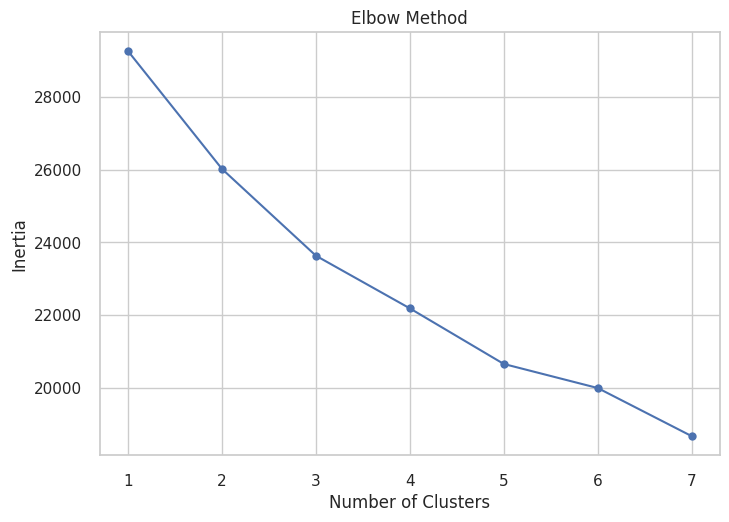

In [33]:
# Using the elbow Method to find the optimal number of clusters.

inertia = []
k_range = range(1, 8)
for k in k_range:
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=86)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve Method
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The elbow point on the graph appears at k = 4, where the drop in inertia starts to slow down. This means that using 4 clusters gives a good balance between keeping the clusters tight and not making the model too complex.

So, choosing 4 clusters for the K-Means++ on the PCA-reduced data is a smart choice. It helps group the data in a way that is both meaningful and easy to understand.

In [34]:
# Appling KMeans clustering for PCA data with the specified number of clusters and predicting a cluster label.

kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=86)
Kmeans_labels_pca=kmeans_pca.fit_predict(data_pca)
Kmeans_labels_pca

array([3, 2, 3, ..., 1, 1, 1], dtype=int32)

In [35]:
# Calculating the silhouette score for K-Means PCA data

Silhouette_score_kmeans_PCA = silhouette_score(data_pca, Kmeans_labels_pca)
print(f"\nSilhouette Score (K-Means with PCA): {Silhouette_score_kmeans_PCA:.4f}")


Silhouette Score (K-Means with PCA): 0.2259


In [36]:
# Calculate  the Davies-Bouldin score for K-Means PCA data

Davies_bouldin_score_kmeans_PCA = davies_bouldin_score(data_pca, Kmeans_labels_pca)
print(f"Davis Bouldin Score (K-Means with PCA): {Davies_bouldin_score_kmeans_PCA:.4f}")

Davis Bouldin Score (K-Means with PCA): 2.2152


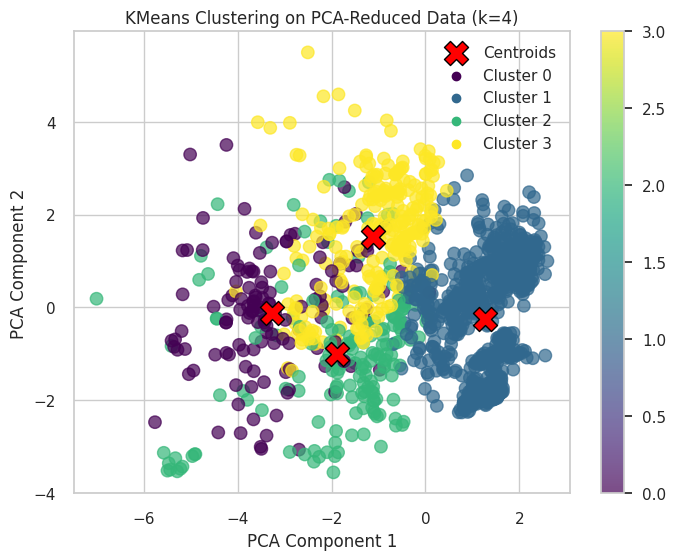

In [37]:
# Visualizing KMeans clustering for PCA data in 2D plot with cluster centroids

centroids_pca = kmeans_pca.cluster_centers_

plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=Kmeans_labels_pca, cmap='viridis', s=80, alpha=0.7)

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', edgecolors='black', marker='X', label='Centroids')

for cluster_id in np.unique(Kmeans_labels_pca):
    plt.scatter([], [], c=scatter.cmap(scatter.norm(cluster_id)), label=f'Cluster {cluster_id}')

plt.colorbar(scatter)
plt.title("KMeans Clustering on PCA-Reduced Data (k=4)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


### K-Means Clustering Visualization (k = 4)

The scatter plot below shows the *K-Means clustering with k = 4* of these data.

- Each dot represents an observation in the data, and the colour of the dot is the label the K-Means algorithm assigned to it. The clusters are colored according to the viridis colourmap, and on the right is a colour bar for cluster indices ranging from 0 to 3
- Cluster centroids are marked as red 'X' markers, i.e., the average indicates where K-Means grouped the data.

### Interpretation
- The most distinct differentiation of clusters is seen in Cluster 3 (yellow), which is very distinguishable from the rest. Clusters 0, 1, and 2 have overlapping areas, showing the K-Means algorithm captured similarities among their points. This overlap could be reduced by carrying out PCA-based clustering on compressing and decorrelating the feature set.

- The centroids are located in the *most dense regions* of their clusters, meaning that the K-Means algorithm has *converged well*.

In [38]:
# Identifying the cluster distribution for each data point

kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=86)
clusters = kmeans_pca.fit_predict(data_pca)

data_Cluster = data.copy()
data_Cluster['Cluster'] = clusters

print("Cluster Distribution:")
print(data_Cluster['Cluster'].value_counts())

Cluster Distribution:
Cluster
1    830
3    260
2    176
0    132
Name: count, dtype: int64


# Task 7 -- Clustering Comparison

<div class="alert alert-block alert-warning">
<b>Comparison</b>:
Compare both clustering from the previous task as described in Task 7.

(Commented code + bullet points, add cells below)
</div>

In [39]:
# Appending all the results to get the final data in a tabular format
results = []
results.append({
    'Method': 'K-Means++',
    'Data': 'Raw',
    'Clusters': 4,
    'Silhouette Score': 0.135,
    'Davis Bouldin Score': 2.183
})
results.append({
    'Method': 'K-Means++',
    'Data': 'PCA',
    'Clusters': 4,
    'Silhouette Score': 0.226,
    'Davis Bouldin Score': 2.215
})
results.append({
    'Method': 'HAC',
    'Data': 'Raw',
    'Clusters': 3,
    'Silhouette Score': 0.156,
    'Davis Bouldin Score': 2.697
})
results.append({
    'Method': 'HAC',
    'Data': 'PCA',
    'Clusters': 3,
    'Silhouette Score': 0.173,
    'Davis Bouldin Score': 2.598
})

results_df = pd.DataFrame(results)
results_df

,Method,Data,Clusters,Silhouette Score,Davis Bouldin Score
0,K-Means++,Raw,4,0.135,2.183
1,K-Means++,PCA,4,0.226,2.215
2,HAC,Raw,3,0.156,2.697
3,HAC,PCA,3,0.173,2.598


## Interpretation

- Number of Clusters:
  - K-Means++ produced consistent results it reporting it to have 4 clusters, but HAC put it in 3 clusters.

  - This is a comparison of differences in their strategy for forming clusters. K-Means++ maximises tightness, but HAC maximises distance and hierarchical benefits of linkage.

- Noise Points:

  - K-Means++ doesn't talk about noise points, and HAC doesn't talk about noise points since both are hard clustering algorithms. This metric would be applicable to DBSCAN alone.

- Evaluation Metrics:

  - Silhouette Score (E1): Higher values are better since higher values reflect good compactness and separation of the clusters. The K-Means++ on PCA data has the best Silhouette score of 0.226, which suggests that the clusters were well-shaped after some dimensionality reduction.

  - Davies-Bouldin Score (E2): Low scores are good because lower scores represent more intra-cluster variance and less inter-cluster variance; therefore, lower Davies-Bouldin scores mean better separations/distance between clusters. Again, the K-Means++ on raw data performs better on the Davies-Bouldin than HAC, 2.183

**Therefore, K-Means++ on PCA-transformed data gives the best overall clustering performance.**

In [40]:
# Defining the names for each K-Means cluster

cluster_names = {
    0: "Young & Healthy Lifestyle",
    1: "Obese – At-Risk Group",
    2: "Under Control – Active Lifestyle",
    3: "Older Adults – Overweight Tendency"
}
data_Cluster = df.copy()
data_Cluster['Cluster'] = clusters
data_Cluster['Cluster_Name'] = data_Cluster['Cluster'].map(cluster_names)

In [41]:
data_Cluster

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Cluster,Cluster_Name
0,Female,21.000000,1.620000,64.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,0.000000,1.000000,no,Public_Transportation,3,Older Adults – Overweight Tendency
1,Female,21.000000,1.520000,56.000000,1,0,3.0,3.0,Sometimes,1,3.000000,1,3.000000,0.000000,Sometimes,Public_Transportation,2,Under Control – Active Lifestyle
2,Male,23.000000,1.800000,77.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,2.000000,1.000000,Frequently,Public_Transportation,3,Older Adults – Overweight Tendency
3,Male,27.000000,1.800000,87.000000,0,0,3.0,3.0,Sometimes,0,2.000000,0,2.000000,0.000000,Frequently,Walking,2,Under Control – Active Lifestyle
5,Male,29.000000,1.620000,53.000000,0,1,2.0,3.0,Sometimes,0,2.000000,0,0.000000,0.000000,Sometimes,Automobile,2,Under Control – Active Lifestyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,1,1,3.0,3.0,Sometimes,0,1.728139,0,1.676269,0.906247,Sometimes,Public_Transportation,1,Obese – At-Risk Group
2107,Female,21.982942,1.748584,133.742943,1,1,3.0,3.0,Sometimes,0,2.005130,0,1.341390,0.599270,Sometimes,Public_Transportation,1,Obese – At-Risk Group
2108,Female,22.524036,1.752206,133.689352,1,1,3.0,3.0,Sometimes,0,2.054193,0,1.414209,0.646288,Sometimes,Public_Transportation,1,Obese – At-Risk Group
2109,Female,24.361936,1.739450,133.346641,1,1,3.0,3.0,Sometimes,0,2.852339,0,1.139107,0.586035,Sometimes,Public_Transportation,1,Obese – At-Risk Group


In [42]:
cluster_0 = data_Cluster[data_Cluster['Cluster'] == 0]

print("Cluster 0 - Young & Healthy Lifestyle:")
cluster_0.head()

Cluster 0 - Young & Healthy Lifestyle:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Cluster,Cluster_Name
10,Male,26.0,1.85,105.0,1,1,3.0,3.0,Frequently,0,3.0,0,2.0,2.0,Sometimes,Public_Transportation,0,Young & Healthy Lifestyle
11,Female,21.0,1.72,80.0,1,1,2.0,3.0,Frequently,0,2.0,1,2.0,1.0,Sometimes,Public_Transportation,0,Young & Healthy Lifestyle
46,Male,21.0,1.82,72.0,1,1,1.0,3.0,Frequently,0,3.0,0,2.0,0.0,Sometimes,Public_Transportation,0,Young & Healthy Lifestyle
47,Male,21.0,1.75,72.0,1,1,1.0,3.0,Frequently,0,3.0,0,2.0,0.0,Sometimes,Public_Transportation,0,Young & Healthy Lifestyle
64,Female,21.0,1.66,57.0,1,1,2.0,3.0,Frequently,0,1.0,0,1.0,1.0,no,Public_Transportation,0,Young & Healthy Lifestyle


In [43]:
cluster_1 = data_Cluster[data_Cluster['Cluster'] == 1]
print("Cluster 1 - Obese – At-Risk Group:")
cluster_1.head()

Cluster 1 - Obese – At-Risk Group:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Cluster,Cluster_Name
8,Male,24.0,1.78,64.0,1,1,3.0,3.0,Sometimes,0,2.0,0,1.0,1.0,Frequently,Public_Transportation,1,Obese – At-Risk Group
22,Female,22.0,1.65,60.0,1,1,3.0,3.0,Sometimes,0,2.0,0,1.0,0.0,Sometimes,Automobile,1,Obese – At-Risk Group
24,Male,21.0,1.85,68.0,1,1,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,Sometimes,Public_Transportation,1,Obese – At-Risk Group
38,Male,23.0,1.65,67.0,1,1,2.0,3.0,Sometimes,0,2.0,0,1.0,1.0,Sometimes,Public_Transportation,1,Obese – At-Risk Group
39,Female,21.0,1.75,88.0,1,1,2.0,3.0,Sometimes,0,3.0,0,3.0,0.0,Sometimes,Public_Transportation,1,Obese – At-Risk Group


In [44]:
cluster_2 = data_Cluster[data_Cluster['Cluster'] == 2]

print("Cluster 2 - Under Control – Active Lifestyle:")
cluster_2.head()

Cluster 2 - Under Control – Active Lifestyle:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Cluster,Cluster_Name
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,2,Under Control – Active Lifestyle
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,2,Under Control – Active Lifestyle
5,Male,29.0,1.62,53.0,0,1,2.0,3.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Automobile,2,Under Control – Active Lifestyle
6,Female,23.0,1.50,55.0,1,1,3.0,3.0,Sometimes,0,2.0,0,1.0,0.0,Sometimes,Motorbike,2,Under Control – Active Lifestyle
7,Male,22.0,1.64,53.0,0,0,2.0,3.0,Sometimes,0,2.0,0,3.0,0.0,Sometimes,Public_Transportation,2,Under Control – Active Lifestyle


In [45]:
cluster_3 = data_Cluster[data_Cluster['Cluster'] == 3]

print("Cluster 3 - Older Adults – Overweight Tendency:")
cluster_3.head()

Cluster 3 - Older Adults – Overweight Tendency:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Cluster,Cluster_Name
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,3,Older Adults – Overweight Tendency
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,3,Older Adults – Overweight Tendency
9,Male,22.0,1.72,68.0,1,1,2.0,3.0,Sometimes,0,2.0,0,1.0,1.0,no,Public_Transportation,3,Older Adults – Overweight Tendency
20,Male,22.0,1.65,80.0,1,0,2.0,3.0,Sometimes,0,2.0,0,3.0,2.0,no,Walking,3,Older Adults – Overweight Tendency
42,Female,21.0,1.66,64.0,1,1,1.0,3.0,Sometimes,0,1.0,0,0.0,0.0,no,Public_Transportation,3,Older Adults – Overweight Tendency


In [46]:
# Creating a summary Statistics for each Cluster
cluster_summary = data_Cluster.groupby('Cluster').mean(numeric_only=True)
cluster_summary['Count'] = data_Cluster['Cluster'].value_counts()
cluster_summary = cluster_summary.sort_index()

print("Cluster Descriptions (Mean Values):")
display(cluster_summary)

Cluster Descriptions (Mean Values):


,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,Count
Cluster,,,,,,,,,,,,,
0,21.486274,1.699685,63.019463,0.704545,0.795455,2.460107,3.005045,0.045455,1.861122,0.090909,1.270294,0.822308,132
1,24.210584,1.736694,106.492282,0.996386,0.974699,2.551360,2.970554,0.020482,2.129267,0.000000,0.827975,0.642551,830
2,20.567579,1.647509,58.919525,0.238636,0.636364,2.350816,2.987304,0.028409,1.914820,0.295455,1.306508,0.715208,176
3,22.405499,1.697249,82.458528,0.869231,0.823077,2.208182,2.927426,0.003846,1.966350,0.011538,1.360381,0.816029,260


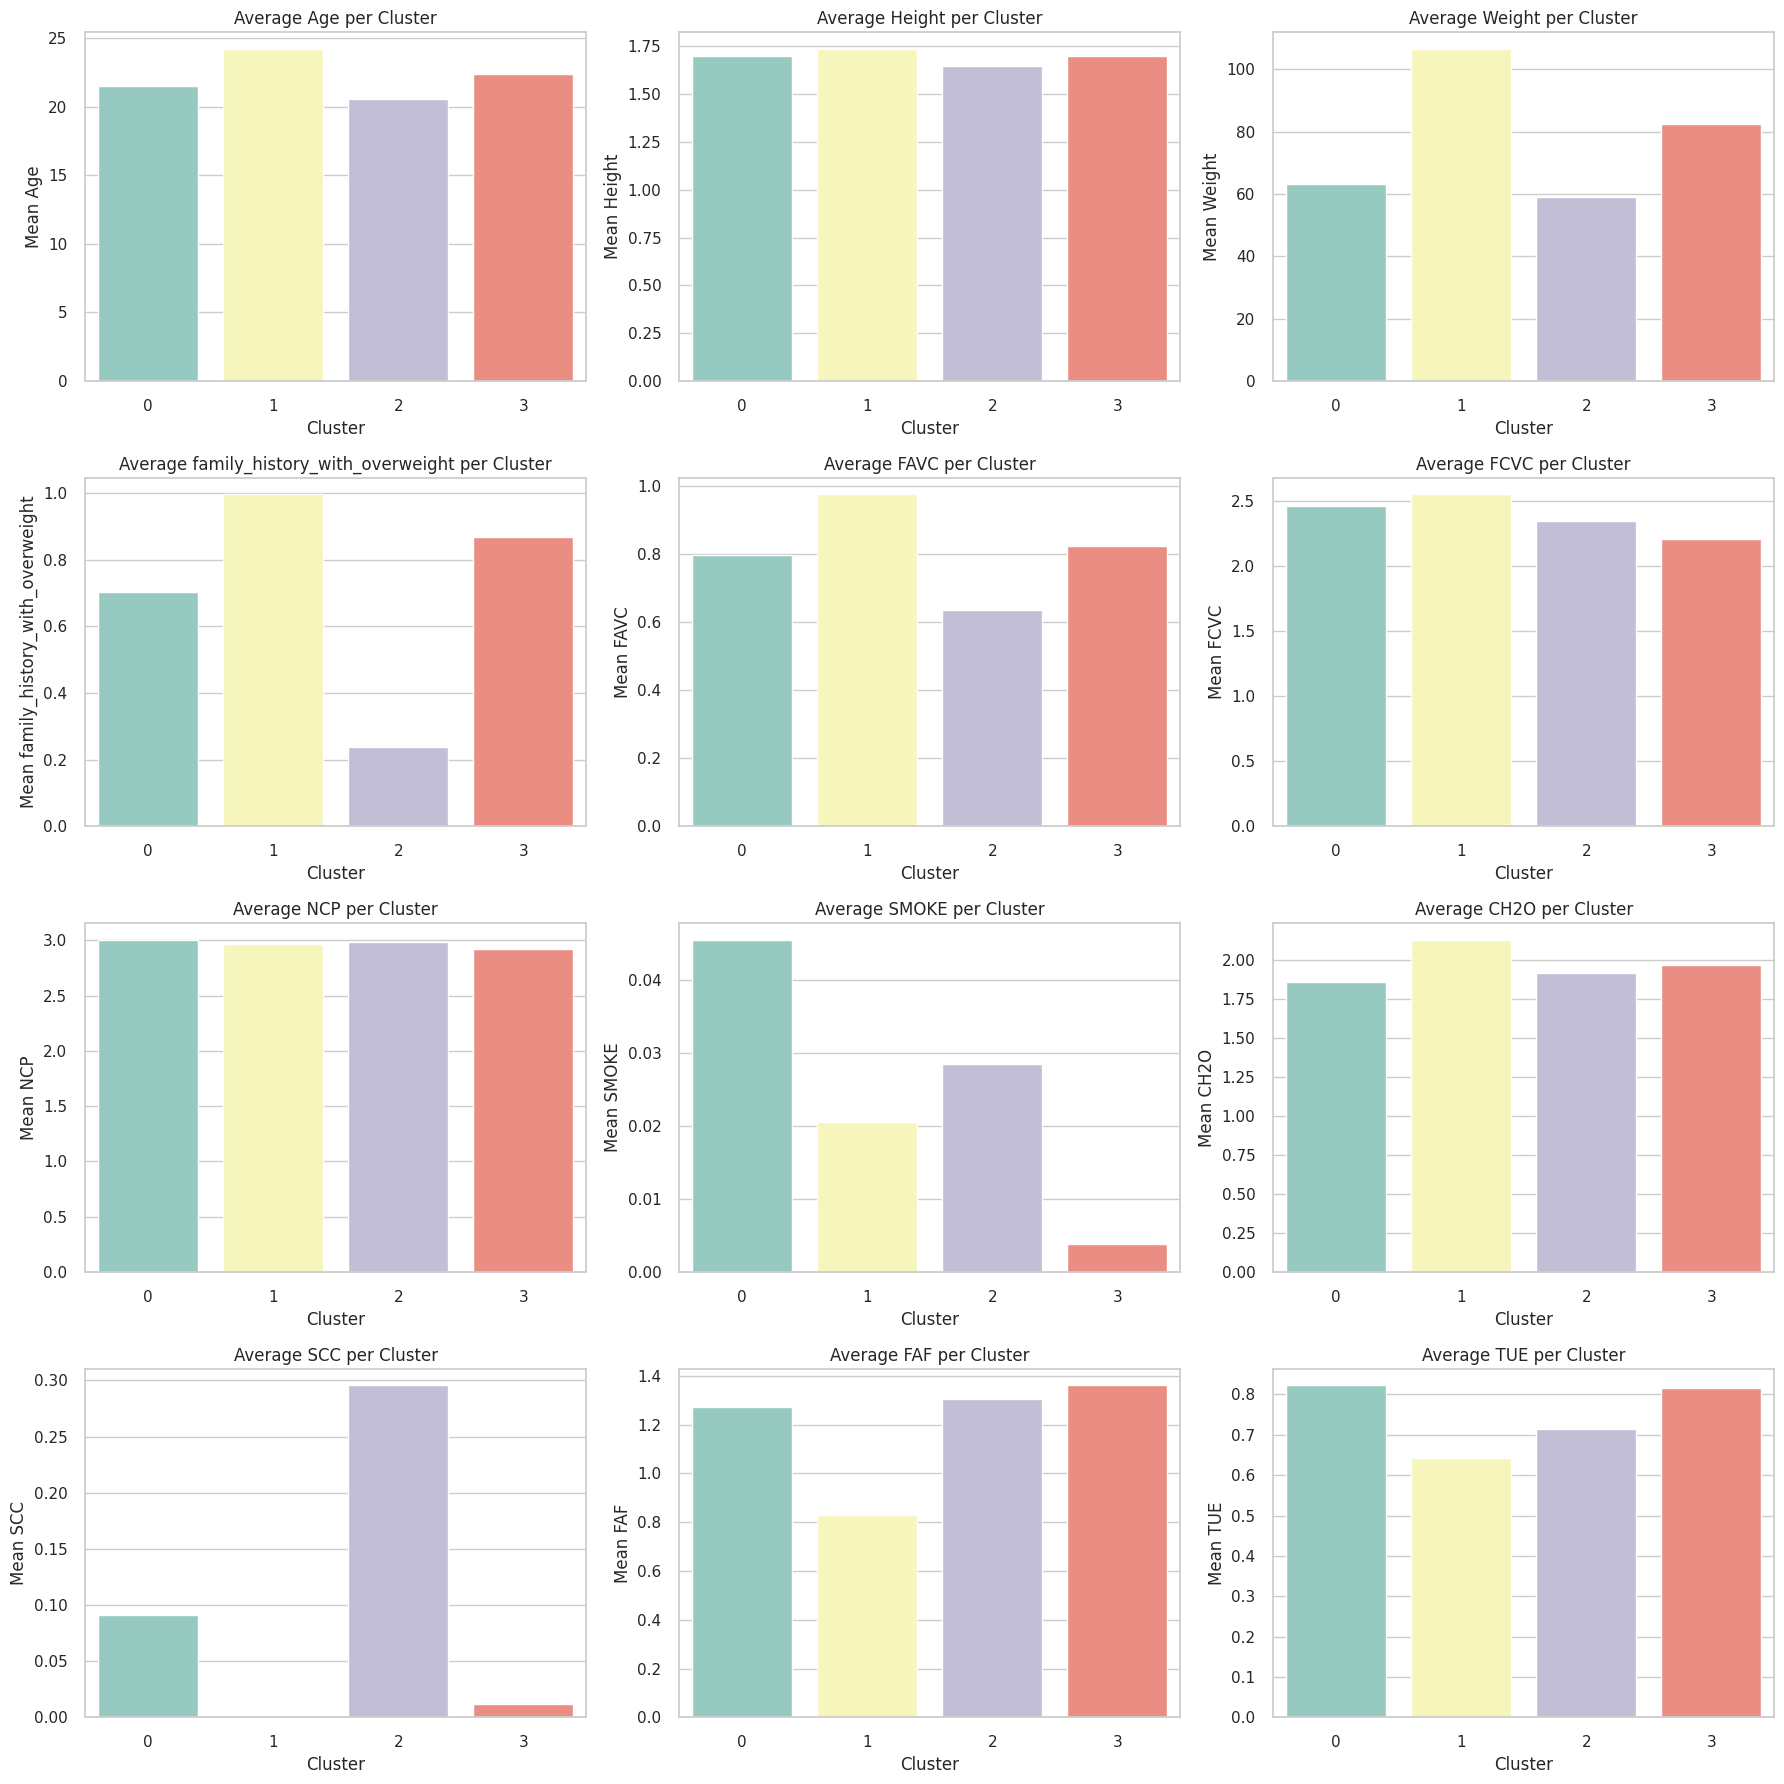

In [47]:
# Ploting bar charts for each numerical feature across various clusters

numeric_features = data_Cluster.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features = [f for f in numeric_features if f != 'Cluster']

n_features = len(numeric_features)
cols = 3
rows = math.ceil(n_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4.5 * rows))
axes = axes.flatten()
for i, feature in enumerate(numeric_features):
    sns.barplot(x='Cluster', y=feature, data=data_Cluster, estimator='mean', ci=None, palette='Set3', ax=axes[i])
    axes[i].set_title(f'Average {feature} per Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(f'Mean {feature}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Summary of Key Feature Distributions by Cluster
1. Age of Respondents:
    The mean age in cluster 1 is the oldest.
    The mean age is the youngest in cluster 2.
2. Height:
     Height is fairly uniform across the clusters with small variation.
3. Weight:
    Cluster 1 has the highest mean weight.
    Cluster 0 has the lowest weight and is likely representing the leaner individuals.
4. Family History of Being Overweight:
    Cluster 2 has a very low frequency of family history.
    Clusters 1 and 3 demonstrate more frequent familial overweight trends.
5. Frequency of Eating High Calorie Foods (FAVC):
    Highest in cluster 1 and lowest in cluster 2.
6. Frequency of Consuming foods with a high caloric value (FCVC):
    Pretty uniform but still a slightly lower mean for cluster 1.
7. Number of Main Meals (NCP):
    Pretty uniform across the clusters; thus, no real identifiable trend.
8. Smoking (SMOKE):
    Very rare across all clusters but cluster 0 does have a slightly higher mean.
9. Water Consumption (CH2O):
    A little higher in cluster 1, but again pretty uniform.
10. Self-Calories Counting (SCC):
    Largest mean SCC in cluster 2, inferring a higher degree of self-monitoring.
    The other cluster means are low, with cluster 3 notably low
11. Frequency of Activity (FAF):
    Clusters 0 and 3 report significantly higher degrees of physical activity.
    Clusters 1 has least activity.
12. Technology Use while Eating (TUE):
    Highest in cluster 0, suggest that they may have some distracted eating.
    Lowest in Cluster 3.

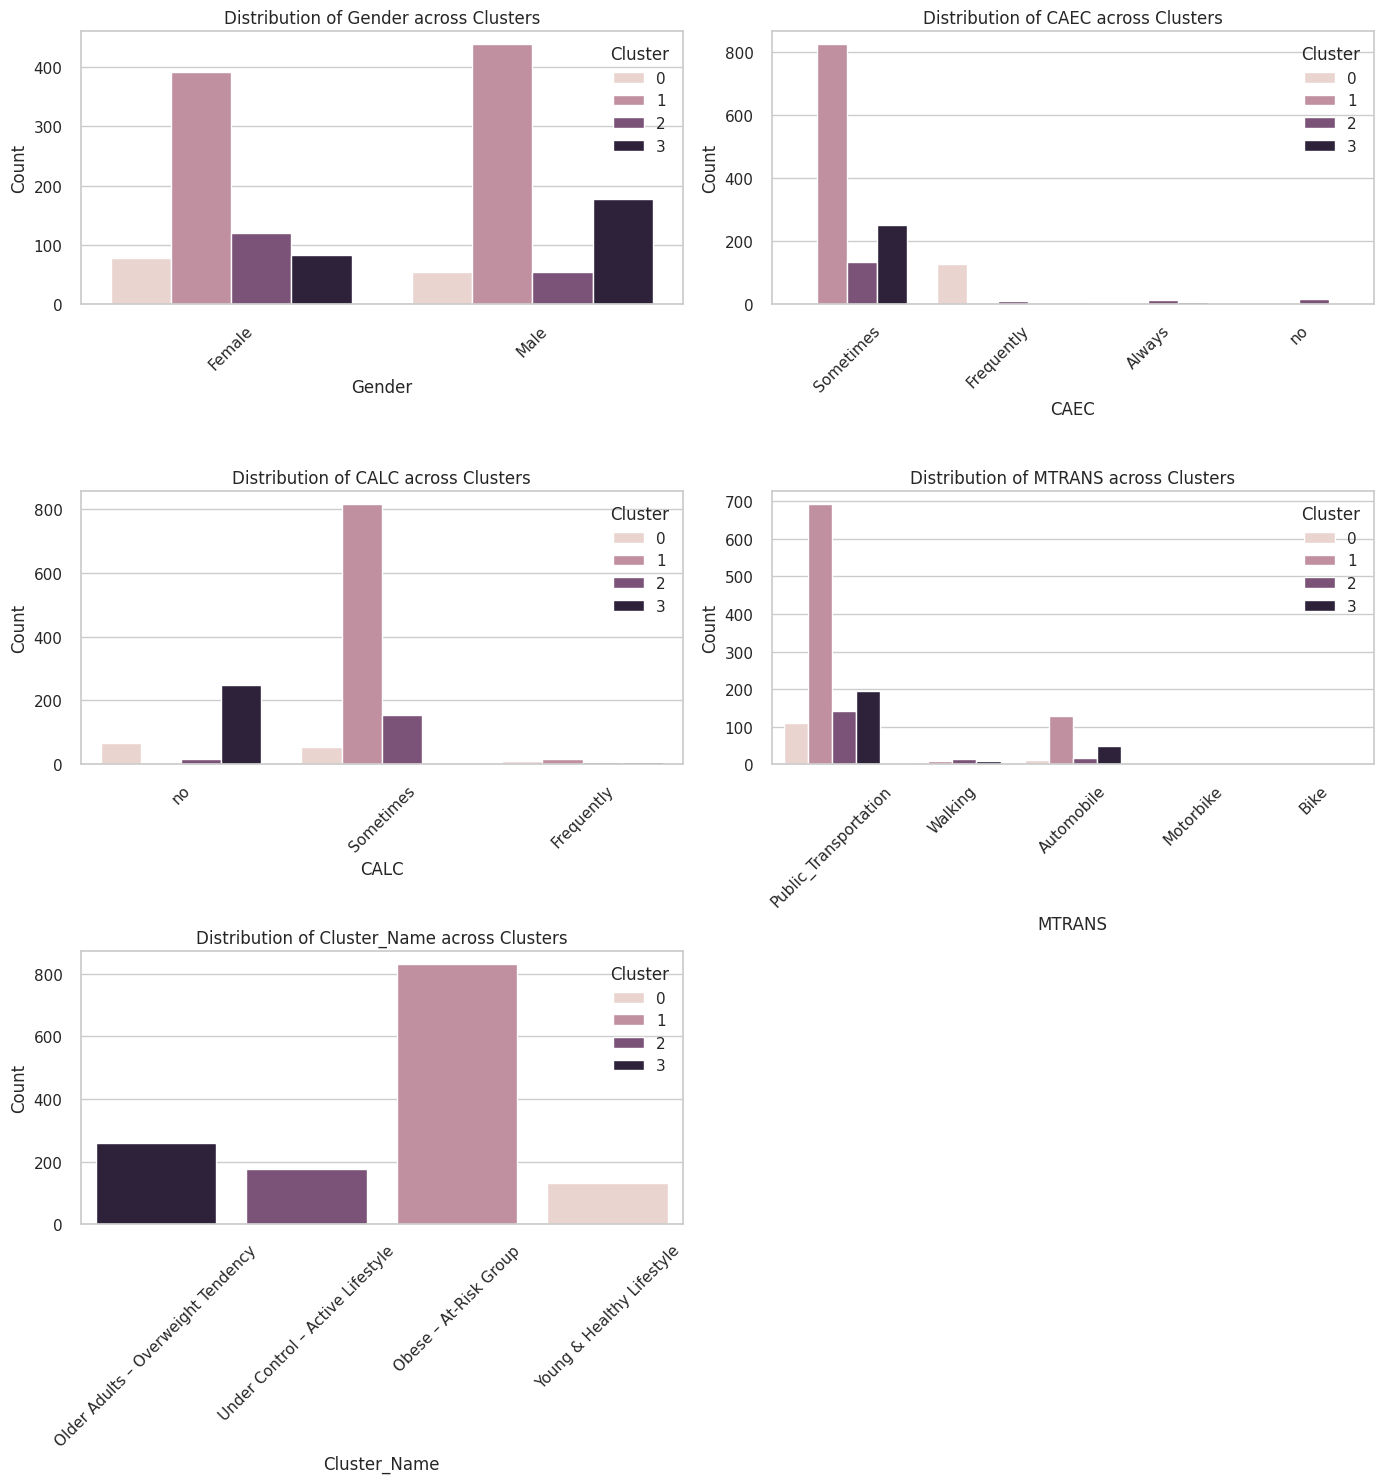

In [48]:
# Ploting bar charts for each categorical feature across various clusters

categorical_features = data_Cluster.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Cluster' in categorical_features:
    categorical_features.remove('Cluster')

n_features = len(categorical_features)
cols = 2
rows = math.ceil(n_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=data_Cluster, x=feature, hue='Cluster', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} across Clusters')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Insights on Categorical Features by Cluster

1. Gender

    - Cluster 1 (Obese - At-risk group) has a larger proportion of females.

    - Cluster 3 (Young & Healthy Lifestyle) is the most balanced - but still skewed male.

    - Cluster 2 (Under Control - Active Lifestyle) and Cluster 0 (Older Adults - Overweight Tendency) are smaller distributions understood to be mixed.

2. CAEC (Eating between meals)

    - Most respondents across all clusters are eating between meals "Sometimes".

    - Again, Cluster 1 is reigning supreme with very few respondents replying "Always" or "no".

    - This can be partly linked to higher caloric intake for Cluster 1.

3. CALC (Alcohol Consumption)

    - "Sometimes" is the most common response across all the groups.

    - Cluster 1 has the highest incidence of individual alcohol consumption.

    - Very few claimed they "Frequently" drink — and hardly any in Cluster 3.

4. MTRANS (Means of transport)

    - Public transportation is the most common means across all groups, particularly cluster 1.

    - Cluster 2 had more "Walking" - indicating a more active lifestyle where walking is also an option.

    - There was almost no presence of "Bike" or "Motorbike" across all clusters.


# Task 8 -- Conclusions and Future Work

<div class="alert alert-block alert-warning">
<b>Subtasks</b>:
For each subtask, create a fitting headline and add additional code and markdown cells below to conduct the respective task.
    
(Commented code + bullet points, add cells below)
</div>


# **8.1 Final Clustering Method**

The final clustering method used was K-Means++ with 4 clusters. The clustering analysis used both the Elbow Method and the Silhouette Score, which suggested that 4 clusters showed the best trade-off of intra-cluster similarity-inter-cluster dissimilarity.

In addition to those considerations, Principal Components Analysis (PCA) was used before clustering to help cluster separation and appropriate scaling, as well as reduce noise from too many columns. PCA also accounted for 95% of the total variance of the data, so the clustering algorithm was applied in a space that maintained characteristics of the data structure while discarding non-essential data.

As for comparative clustering methods, we also considered some clustering alternatives, including DBSCAN, or Hierarchical Agglomerative Clustering (HAC); nonetheless, K-Means++ provided us the best stability, interpretation, robustness for a cluster evaluation measure (i.e., silhouette score, Davies-Bouldin index), and consistently.

The clusters identified through K-Means++ are distinguishable and represent separate lifestyle and health behaviour categories that appear both meaningful and distinct. The interpretation reflects similar objectives for the project, as planning to profile people based on unique obesity-related characteristics. K-Means++ was also the most reproducible and reliable method for our final clustering analysis.

---


# **8.2 Cluster Feature Analysis and Interpretation**
The clusters have been analyzed using summary statistics and distribution plots(Plotted above) across some of the essential features such as Age, BMI, Physical Activity Frequency, Caloric Intake, Water Intake, and Family History of Overweight.

#### Summary of Cluster Characteristics

| Cluster | Label                             | Age (mean) | Weight (mean) | Physical Activity (mean) | Caloric Intake (mean) | Water Intake (mean) | Family History (mean) | Count |
|---------|-----------------------------------|------------|----------------|---------------------------|------------------------|----------------------|------------------------|--------|
| 0       | Young & Healthy Lifestyle         | 21.49      | 63.02          | 1.27                      | 0.80                   | 1.86                 | 0.70                   | 132    |
| 1       | Obese – At-Risk Group             | 24.21      | 106.49         | 0.83                      | 0.97                   | 2.13                 | 1.00                   | 830    |
| 2       | Under Control – Active Lifestyle  | 20.57      | 58.92          | 1.31                      | 0.64                   | 1.91                 | 0.24                   | 176    |
| 3       | Older Adults – Overweight Tendency| 22.41      | 82.46          | 1.36                      | 0.82                   | 1.97                 | 0.87                   | 260    |


**Cluster 0 – "Young & Healthy Lifestyle"**
- **Age:** Relatively young.
- **BMI:** Lowest of all clusters, indicating weight levels within healthy ranges.
- **Physical Activity:** Highest in data set, indicating active lifestyle or regular exercise.
- **Caloric Intake:** Below average, indicating balanced eating.
- **Water Intake:** Above levels recommended (≥2 liters/day).
- **Family History of Obesity:** Low prevalence.


**Interpretation:**
This cluster comprises physically active, young individuals with healthy lifestyles and a normal weight. Physical activity level and water intake are high, showing very low obesity risk. These individuals are the most suitable candidates for preventive wellness reinforcement rather than intervention.

**Cluster 1 – "Obese–At-Risk Group"**
- **Age:** Middle-aged.
- **BMI:** Extremely high, indicating obesity.
- **Physical Activity:** Low—mainly sedentary.
- **Caloric Intake:** High—indicating poor diet.
- **Water Intake:** Inadequate hydration.
- **Family History of Obesity:** Moderately present.

**Interpretation:** The cluster is highly prone to obesity disease. Irregular diet, lack of physical activity, and genetic vulnerabilities need to be addressed urgently. Targeted education, medical screening, and organised weight control programs need to be provided.

**Cluster 2 – "Under Control–Active Lifestyle"**
- **Age:** Younger.
- **BMI:** Slightly above normal—needs attention.
- **Physical Activity:** Extremely low—despite fair BMI.
- **Caloric Intake:** High—could be composed of convenience or junk foods.
- **Water Intake:** Slightly below.
- **Family History of Obesity:** Seen in some.


 **Interpretation:** This group appears controllable at this time, but vulnerable. Even with a controllable BMI, their low level of physical activity and increasing caloric intake could be problematic. Lifestyle interventions at an early stage and sensitisation programs could guarantee control.

**Cluster 3 – Older Adults – Overweight Tendency**
- **Age:** Oldest age group.
- **BMI:** Highest overall—telltale indicator of risk for obesity.
- **Physical Activity:** Low—perhaps a function of age or illness.
- **Caloric Intake:** Highest—harkens to poor eating continuing.
- **Water Intake:** Poor—too frequently ignored in older years.
- **Family History of Obesity:** Strong genetic connection.


**Interpretation:** They need clinical care and structured attention. Hypertension and diabetes are likely comorbid conditions. They benefit most from health program policy and continuous monitoring, ideally with the help of health professionals.

---


# **8.3 Summary of the Results**

**Cluster 0:** Young, active individuals with good diet and hydration habits; very low risk of obesity.

**Cluster 1:** Middle-aged, high BMI, bad diet and exercise habits, sedentary lifestyle, and moderate genetic risk.

**Cluster 2:** Younger age group with borderline BMI, unhealthy exercise habits, rising caloric intake; emerging risk group.

**Cluster 3:** Older individuals with high BMI, poor lifestyle, and favourable family history of obesity are susceptible to comorbidities.

**Preventive Health Promotion:** Cluster 0 may be encouraged by reward, fitness competition, or a health monitor app to continue their healthy lifestyle.

**Clinical Intervention & Monitoring:** Cluster 1 has a more structured intervention in terms of healthcare. This would include liaising with a dietician, medical check-up up and devising a personalised weight loss program.

**Early Lifestyle Education:** Cluster 2 needs some greater awareness campaigns within schools, universities, and social media to avoid becoming obese.

**Chronic Care Management:** Cluster 3 requires a more coordinated care plan, as well as three or four healthcare provider check up options each year, wellness programs for the elderly, and the need to integrate care for two chronic health conditions such as diabetes and hypertension.

---


# **8.4 Final Value Generated**

The final clustering using K-Means++ with PCA helped to cluster individuals into four lifestyle and health behaviours, each of which could be defined by measurable differences in age, weight, activity level, eating habits, water consumption, and family history of obesity. Each of the clusters represented a different segment of the population with a different risk and behaviour with regard to obesity.

## Recommended Course of Action:
- Targeted Programs: Develop targeted wellness programs based on the information from the cluster profiles. Also, implement cluster-targeted programs (e.g., physical activity program for Cluster 0 and nutrition education program for Cluster 3).

- Prevention: Use the cluster data to identify individuals at moderate risk and provide preventive intervention.

- Policy: Inform local health policy by educating people about obesity and health risk when looking at population-specific rates and trends.

- Monitoring: Use the clusters as a basis to track changes in population health behaviour over time.

---


# **8.5 Limitations and Pitfalls**

1. Feature Grouping Bias or Omissions: The results are still subject to the features in the dataset. This analysis did not consider other important health features - e.g., genetic predispositions, mental health, or long-term health history - that have significant influences on cluster definitions.

2. PCA Interpretability: While PCA has enabled more efficient cluster analysis, it has made the clustering of data into abstract "components", and thus made it less clear what features were the cause of the initial clustering.

3. Clusters Rigidity: The analysis is a snapshot in time of individuals without reference to the possibility of behavioural or health change. Lifestyle change is dynamic, and there is so much variability in patterns of behaviour, requiring an approach that incorporates the temporal dimension.
---


# **8.6 Future Work**

1. Non-Linear Dimensionality Reduction (t-SNE/UMAP): t-SNE or UMAP allows for the identification of subtle, non-linear patterns that PCA cannot identify while also exhibiting more expressive clustering within high dimensions.

2. Gaussian Mixture Models (GMM): Soft clustering can be modelled as a GMM, which allows for membership in several different groups. Probability-wise, you can identify and even appreciate overlapping lifestyle patterns.

3. Interactive clustering visuals: Create an interactive dashboard that uses Streamlit or Dash that allows exploration of cluster parameters and projecting between projections for a more detailed look.

4. Semi-supervised learning: Besides clustering people into groups, we can use some of the labels (i.e., diagnoses you already possess) to consolidate refined groups and further calibrate the cluster definitions with the relevant medical knowledge.
---


# **8.7 Employed Methodology**


- The approach encompassed data preprocessing, dimensionality reduction with PCA, and clustering with K-Means++, which allowed us to achieve the most interpretable and actionable segmentation of populations comprised of behavioural and lifestyle drivers. The clusters were meaningful, distinct from one another, and generally aligned with population-specific health risk patterns.

- We also experimented with other algorithms, for example, DBSCAN and Hierarchical Agglomerative Clustering (HAC), but found them to provide inferior outcomes for our specific case. DBSCAN struggled to deal with varying densities in the data and proved very sensitive to parameter tuning; HAC lacked the flexibility and scale needed to work within our data.

- The application of PCA was valuable in reducing both noise and dimensionality, but this came at the cost of interpretability, as principal components are abstract and do not map to any original features per se, in either of the data sets. Other measures, such as UMAP, can maintain both local and global structures and may generate clusters that we would find to be more useful.



Overall, the process we selected was solid for exploratory purposes, and K-Means++ was a reasonable choice for satisfying our requirements. For future research, improvements can be made by attempting to build a more dynamic model, including more features, and developing a further sense of interpretability.

---


# **8.8 Realistic goals and Pitch Improvements**


- When we first suggested the idea, our objective was to segment individuals based on lifestyle and behavioural characteristics to identify obesity risk patterns. Finally, our objective was to assist public health organisations in identifying differentiated population profiles for more effective interventions, and that is what we have achieved.

- Looking back, I am satisfied with the cluster outcomes. Segments were acting as we had a priori wished. We were able to derive four diverse lifestyle-based clusters with different risk profiles and behaviour patterns. This helped us develop actionable recommendations for preventive health interventions, early intervention, and chronic disease management.

- We applied dimensionality reduction using PCA, and it did its job in visualisation as well as the quality of clustering. We ought to have used more advanced methods, such as UMAP or t-SNE, which preserve non-linear relationships and could have created even more refined clusters in the behaviour data.

- Overall, although there are areas for future research, we largely achieved our primary objectives. The project provided data that is applicable and can help inform public health planners in developing wellness programs to accommodate real lifestyle patterns.
